# Anomaly Project

## Project Description:

* This project is to explore Codeup's Curriculum logs in order to identify anomalies and other insights that can be derived from data given and accessed on the codeup data base curriculum logs.

# Data Acquisition and Prep

* Data was acquired from txt file and database and prepped appropriately for each question being answered

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# imports
import pandas as pd
import acquire as a
import prep as p
import explore as e

In [2]:
#q quick view of data
df = a.acquire_curlogs()
df.head()

date                                endpoint  user_id  cohort_id  \
0  2018-02-01  spring/fundamentals/form-model-binding        1        8.0   
1  2018-02-01                       javascript-ii/es6        1        8.0   
2  2018-02-01                           javascript-ii        1        8.0   
3  2018-02-01                                       /        1        8.0   
4  2018-01-31                     javascript-i/arrays        1        8.0   

      source_ip    name  program_id  
0  97.105.19.61  Arches           1  
1  97.105.19.61  Arches           1  
2  97.105.19.61  Arches           1  
3  97.105.19.61  Arches           1  
4  97.105.19.61  Arches           1

# 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

> - The lessons most visited based off of the visuals below are:
>    - The index.html for Web Development
>    - The spring lesson in Cloud Admin
>    - appendix/mysql lesson in Data Science
> 
> This appears to be the case when the data is filtered using keywords of lessons (endpoint) and masked to return only those type of > lesson associated with that program type.

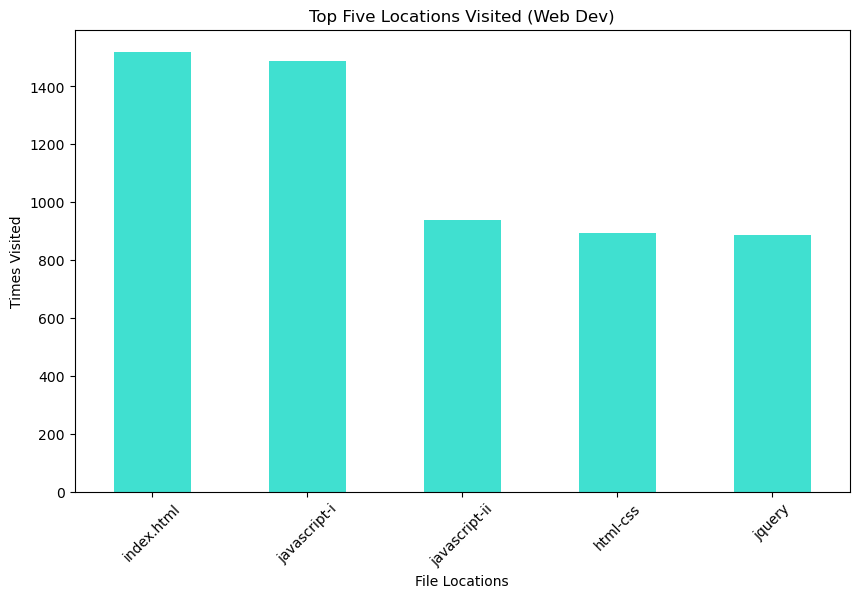

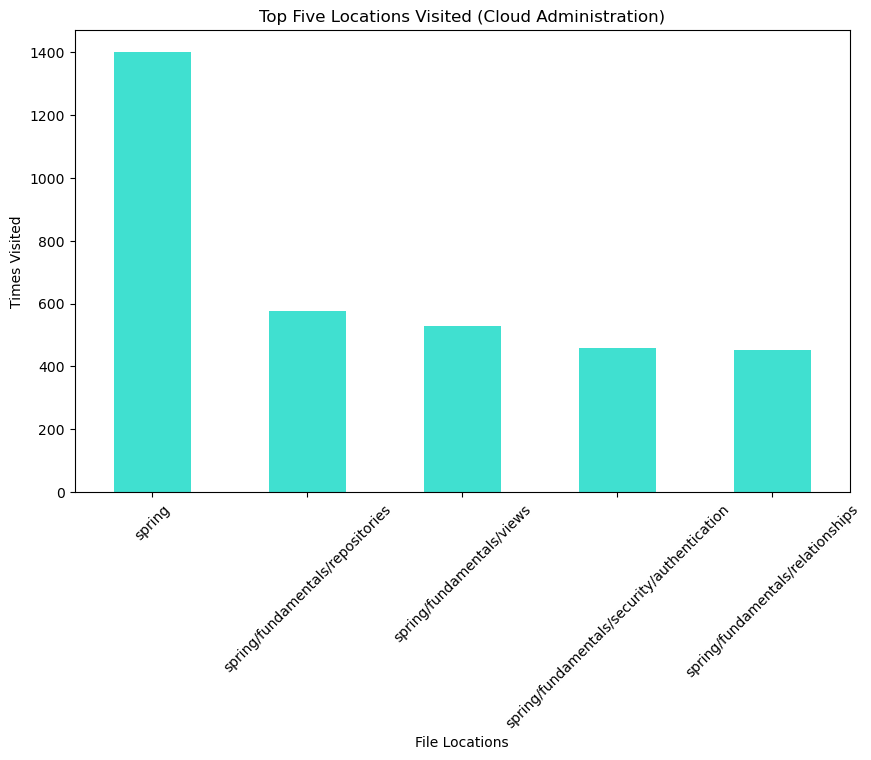

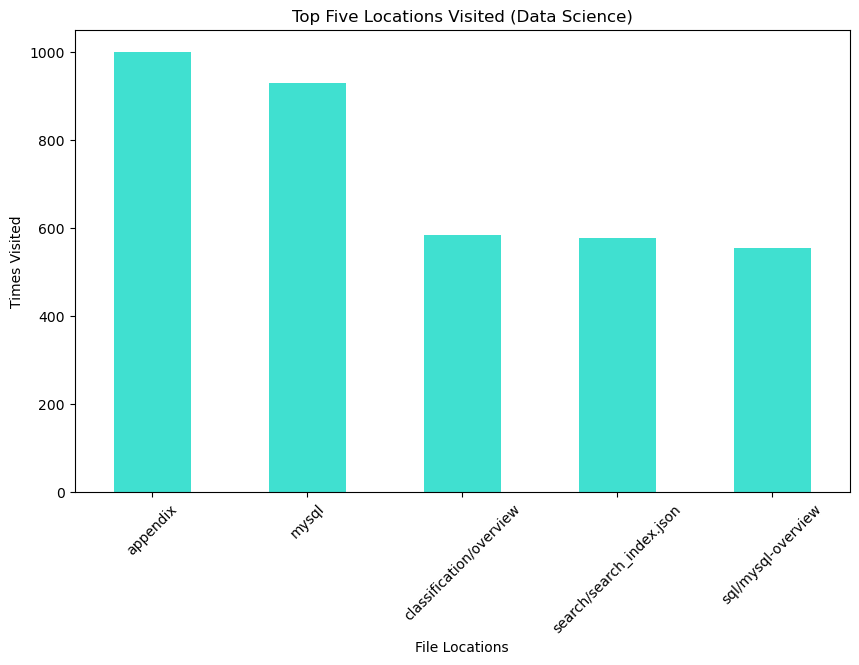

In [3]:
# Web Development
df_wd = df[df['endpoint'].str.contains('javascript|css|html|bootstrap|web-design|jquery|mkdocs', case=False)]
e.plot_top_five_endpoints(df_wd, 'Top Five Locations Visited (Web Dev)')

# Cloud Administration
df_cloud = df[df['endpoint'].str.contains('spring|flask|virtual-enviornments|ajax|php', case=False)]
e.plot_top_five_endpoints(df_cloud, 'Top Five Locations Visited (Cloud Administration)')

# Data Science
df_ds = df[~df['endpoint'].str.contains('javascript|html|css|spring|java|bootstrap|web-design|jquery|mkdocs/search_index.json|spring|flask|virtual-enviornments|ajax|php|slides/sessions_and_cookies|slides/console_io|slides', case=False, na=False, regex=True)]
e.plot_top_five_endpoints(df_ds, 'Top Five Locations Visited (Data Science)')

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

> - There were a few cohorts that did gloss over the top 5 which is what we based our findings on. Which cohorts glanced over these top > 5 most visited lessons.
>     - The lessons most reffered to based off of the visuals below were,
>         - web development:  index(resources link), javascript i, and javascript ii.
>         - Cloud: Spring, relationships and repositories subfolders
>         - Data Science: sql, classification

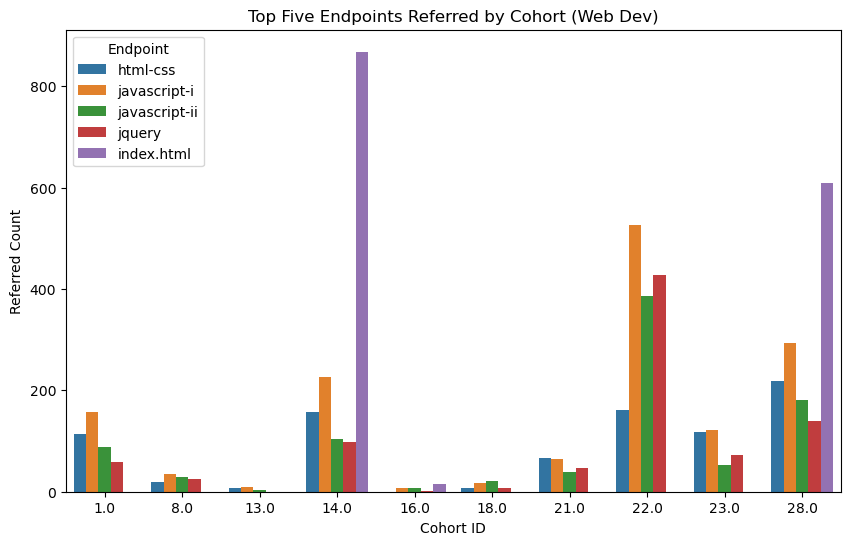

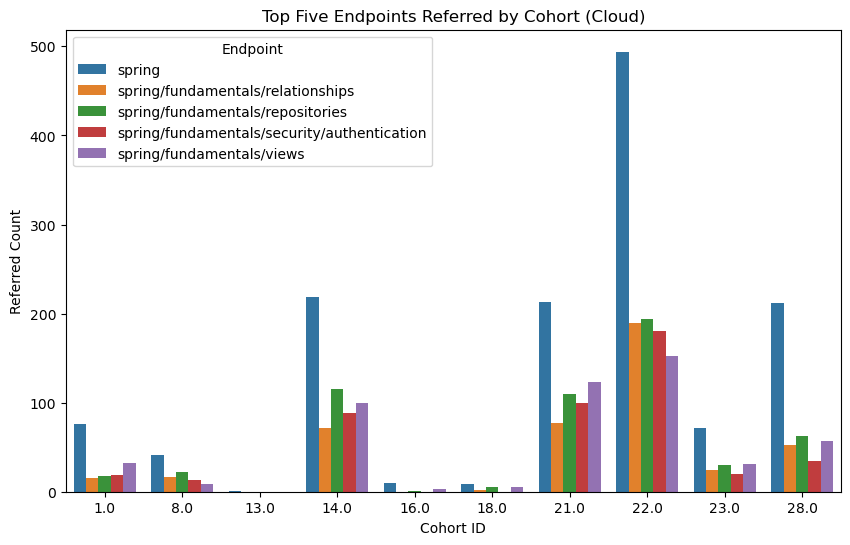

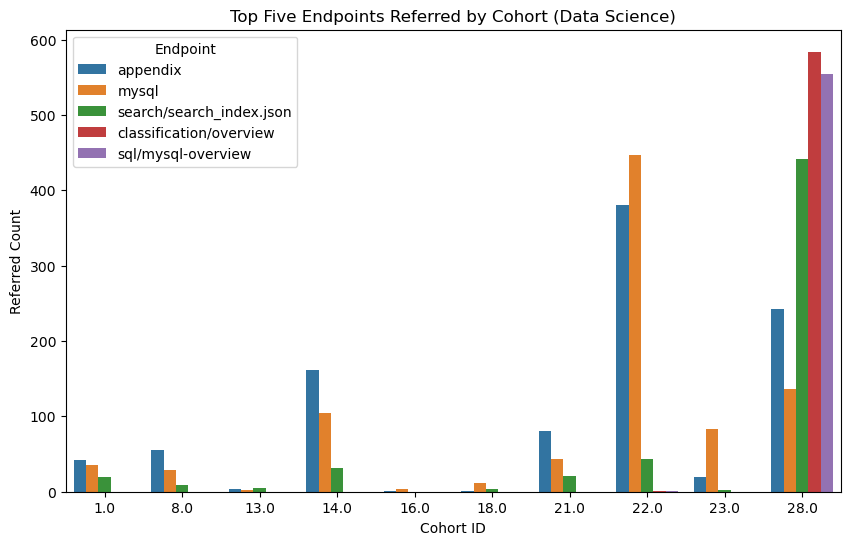

In [4]:
# home folder removed
df = df[df['endpoint'] != '/']

# Web Development
df_wd = df[df['endpoint'].str.contains('javascript|css|html|bootstrap|web-design|jquery|mkdocs', case=False)]
e.plot_cohort_endpoint_counts(df_wd, 'Top Five Endpoints Referred by Cohort (Web Dev)')

# Cloud Administration
df_cloud = df[df['endpoint'].str.contains('spring|flask|virtual-enviornments|ajax|php', case=False)]
e.plot_cohort_endpoint_counts(df_cloud, 'Top Five Endpoints Referred by Cohort (Cloud)')

# Data Science
df_ds = df[~df['endpoint'].str.contains('javascript|html|css|spring|java|bootstrap|web-design|jquery|mkdocs/search_index.json|spring|flask|virtual-enviornments|ajax|php|slides/sessions_and_cookies|slides/console_io|slides', case=False, na=False, regex=True)]
e.plot_cohort_endpoint_counts(df_ds, 'Top Five Endpoints Referred by Cohort (Data Science)')

# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

>User 13: Most visited endpoint is 'javascript-i/functions' with 12 visits.  
>User 24: Most visited endpoint is 'mkdocs/search_index.json' with 3 visits.  
>User 55: Most visited endpoint is 'spring/fundamentals/security/authentication' with 9 visits.

## **Visual Representation below:**

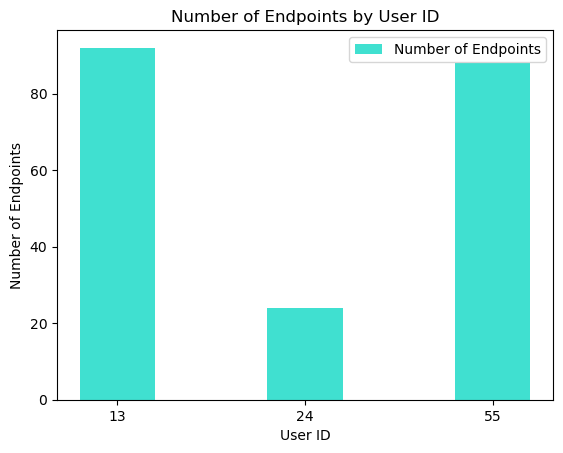

User 13: Most visited endpoint is 'javascript-i/functions' with 12 visits.
User 24: Most visited endpoint is 'mkdocs/search_index.json' with 3 visits.
User 55: Most visited endpoint is 'spring/fundamentals/security/authentication' with 9 visits.


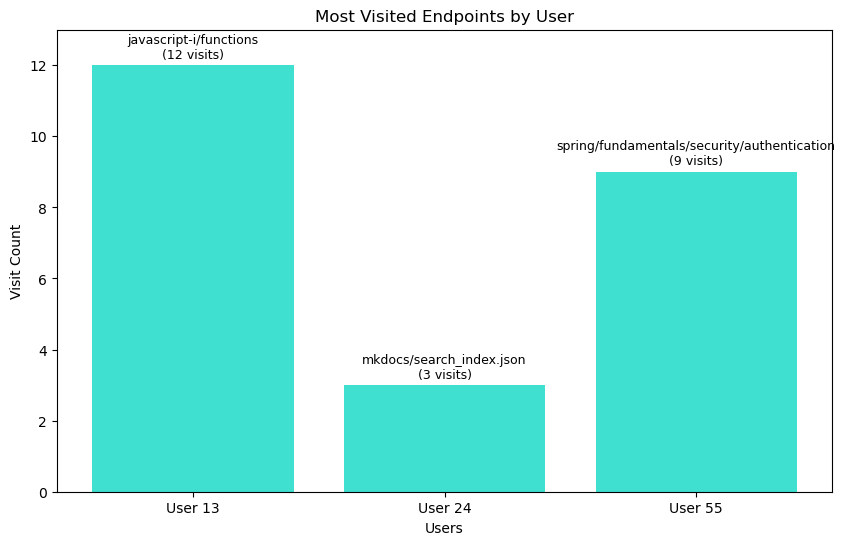

In [5]:
# data grouped by and reset index for dataframe
user_activity_df = df.groupby('user_id')['endpoint'].count().reset_index()
inactive_users = e.plot_user_activity(user_activity_df)

# plot of endpoint by low activity user ids
user_ids = [13, 24, 55]
num_endpoints = [92, 24, 88]
e.plot_num_endpoints(user_ids, num_endpoints)

# most visited lessons by low activity users
user_ids = [13, 24, 55]
e.find_most_visited_endpoint(df, user_ids)

# plotted visited lessons
users = ['User 13', 'User 24', 'User 55']
endpoints = ['javascript-i/functions', 'mkdocs/search_index.json', 'spring/fundamentals/security/authentication']
visit_counts = [12, 3, 9]
e.plot_most_visited_endpoints(users, endpoints, visit_counts)


## 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

> - The data used for the anomaly search for this question used the txt file provided in the email.
>      - The data was index by timestamps and then organized by to include page count for each user listed in the database.
>      - The plot below shows us page counts were very high between January and May of 2019 and again from June to October 2020.

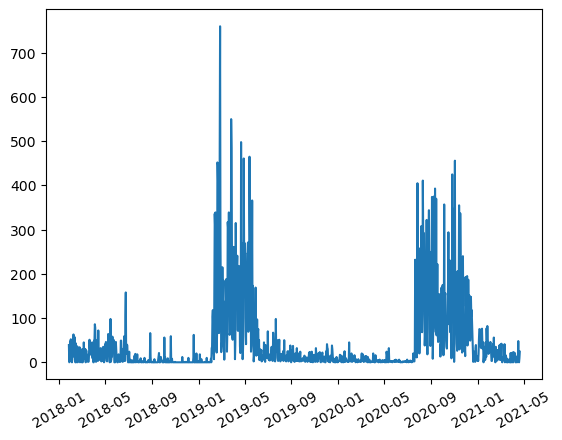

In [6]:
# Define column names
colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']

file_name = "anonymized-curriculum-access.txt"
df = a.acquire(file_name)

# return users with no listed cohort id
df = df[pd.isnull(df['cohort_id'])]

  

# # Plot pages over time
e.plot_pages_over_time(df)

> - In these visual representations each user was analyzed under the microscope to see if there was anomalies in how many pages they were accessing.
>      - Based on the plots we can see which users accessed pages passed out upper band indicating their activity is anomolous and does raise some suspicion. Although we cannot confirm that is the case it is interesting to distinguish each user activities accessing the codeup curriculum.

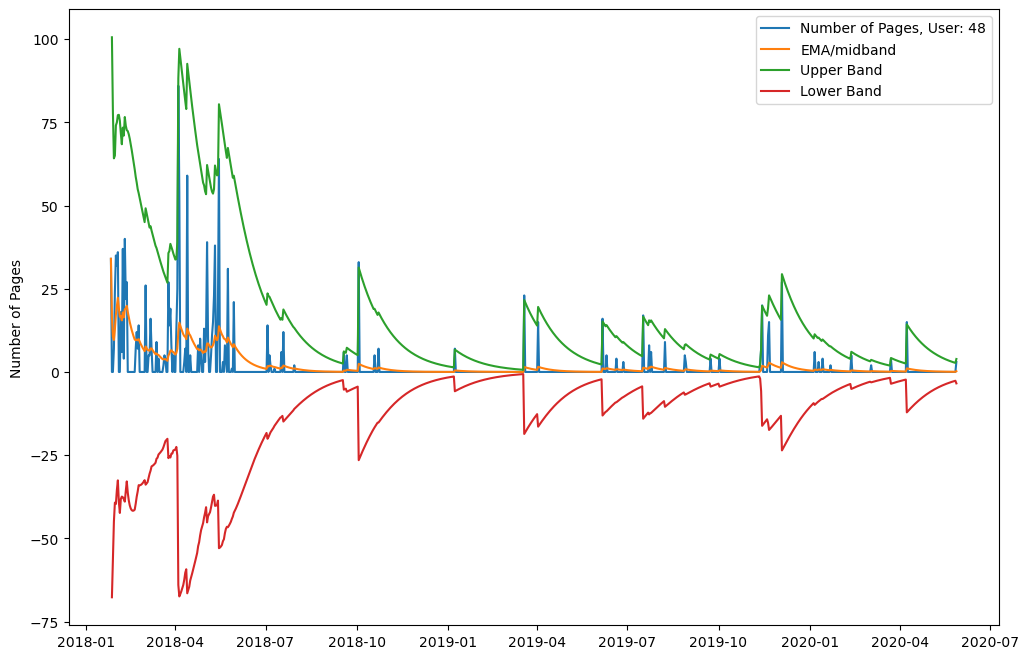

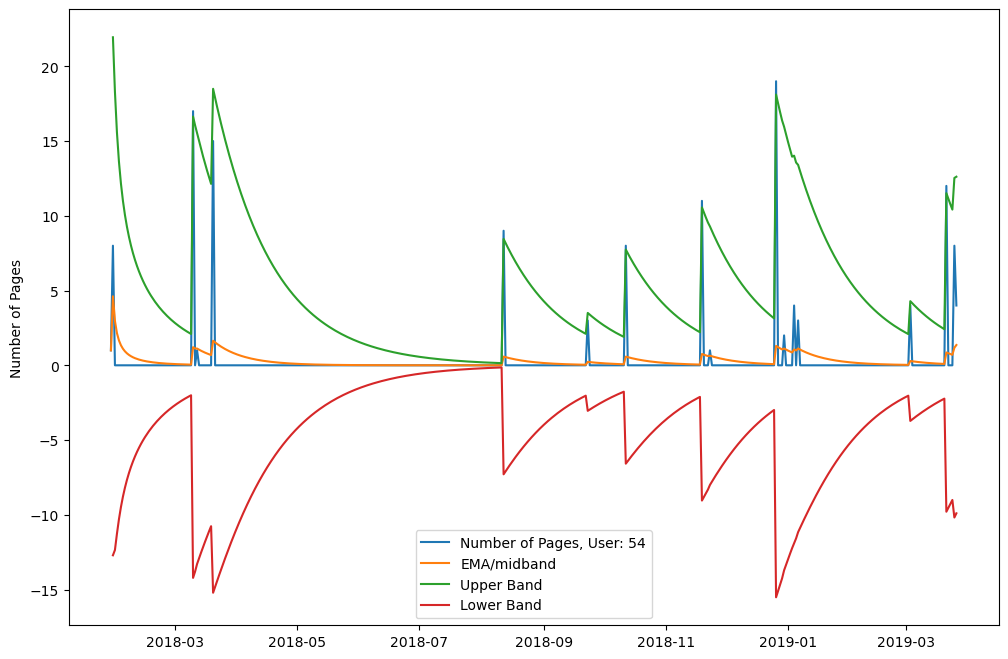

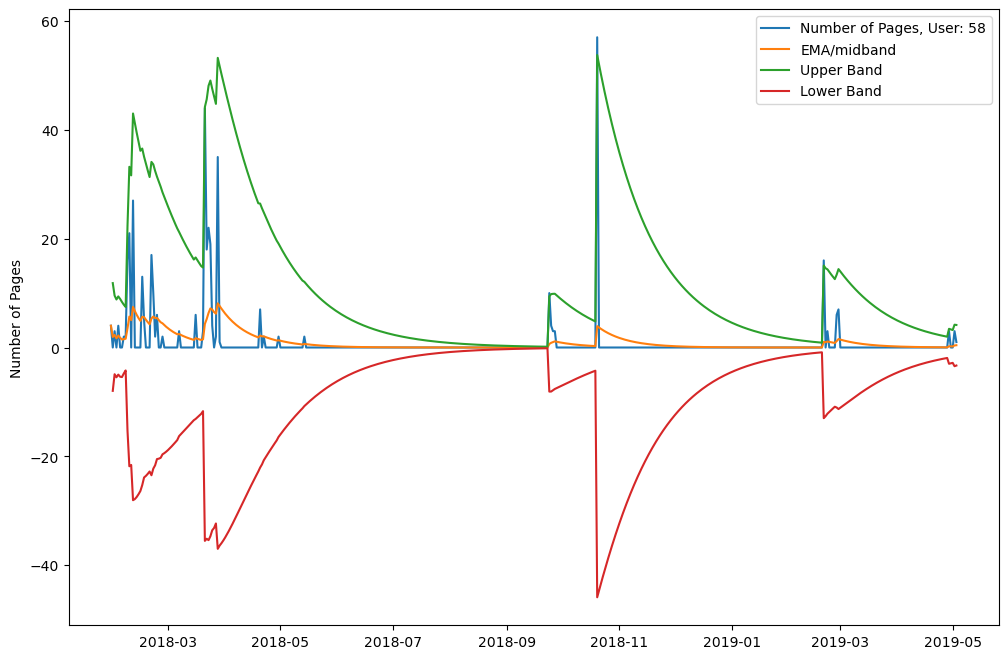

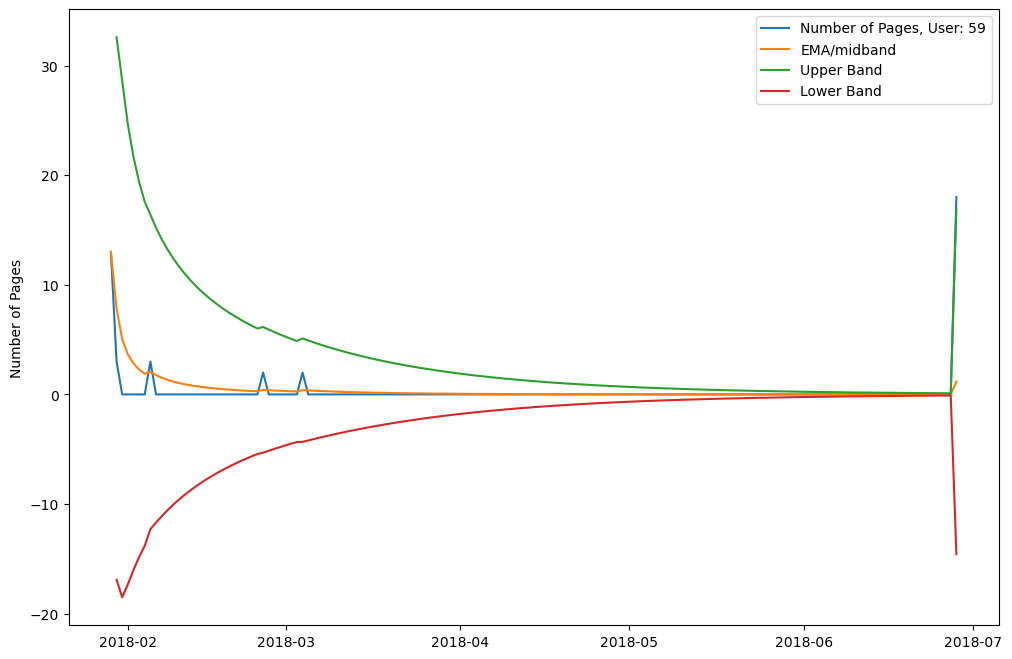

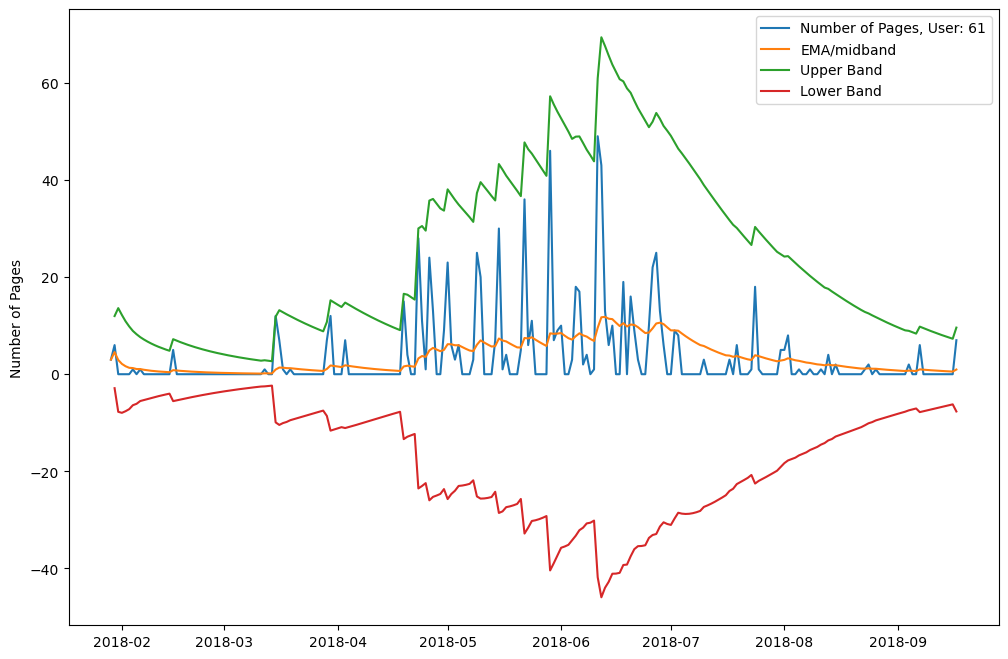

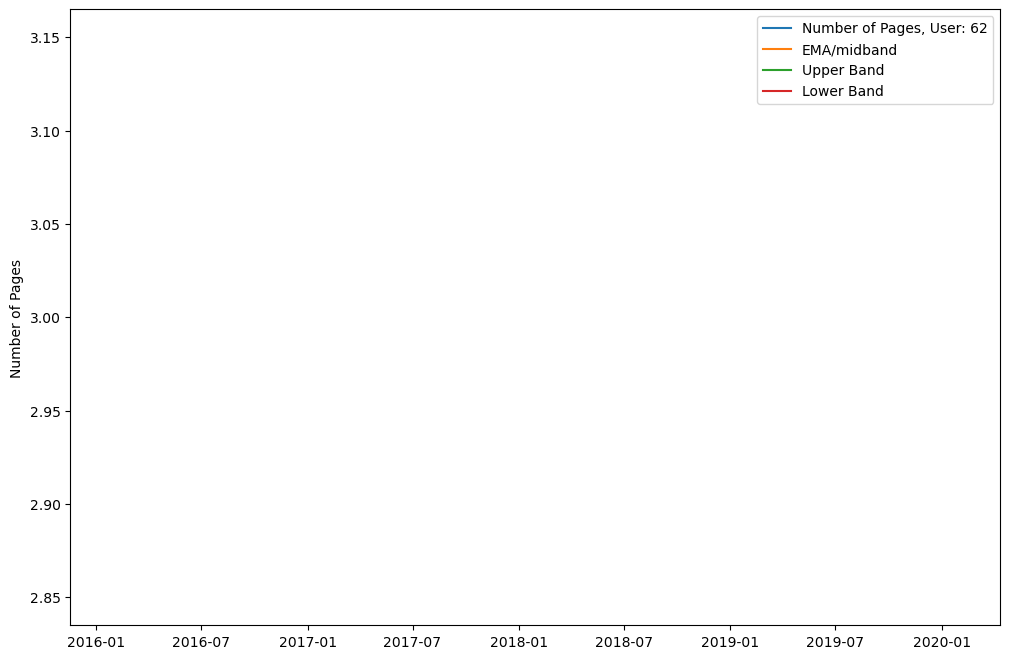

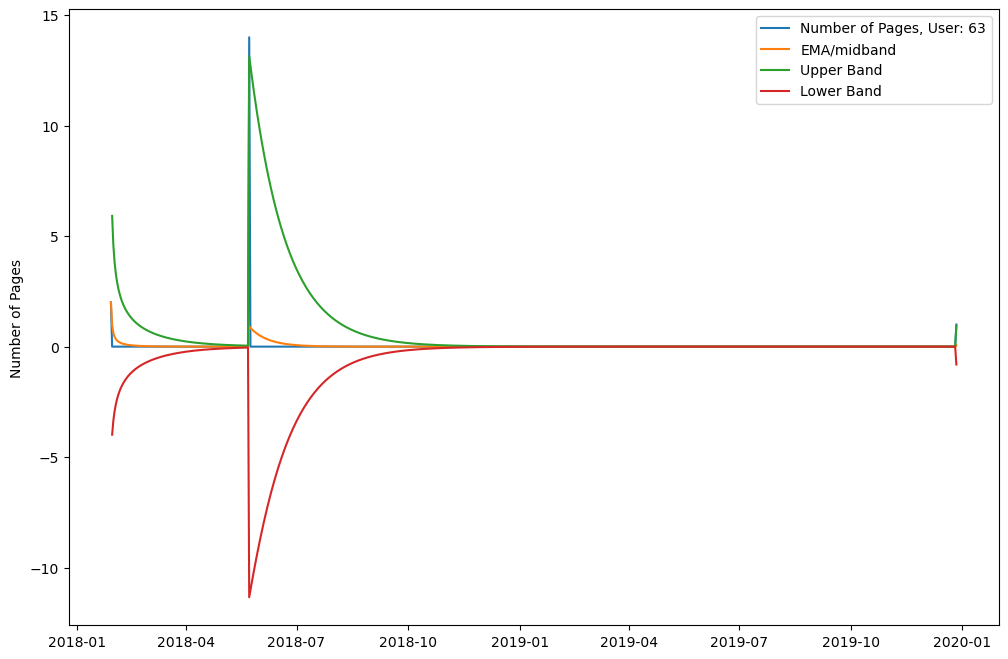

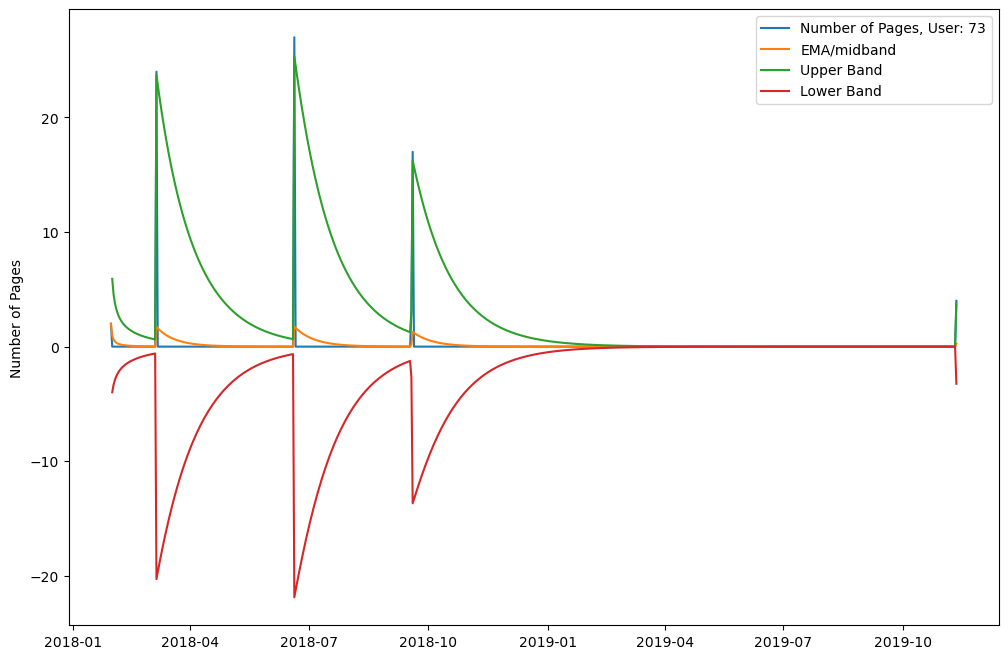

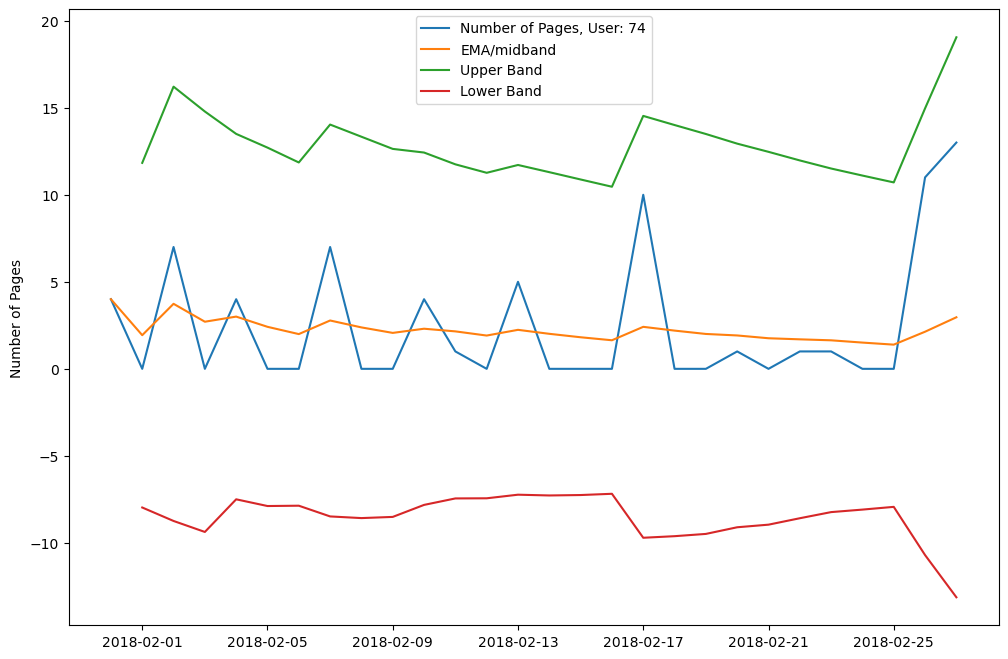

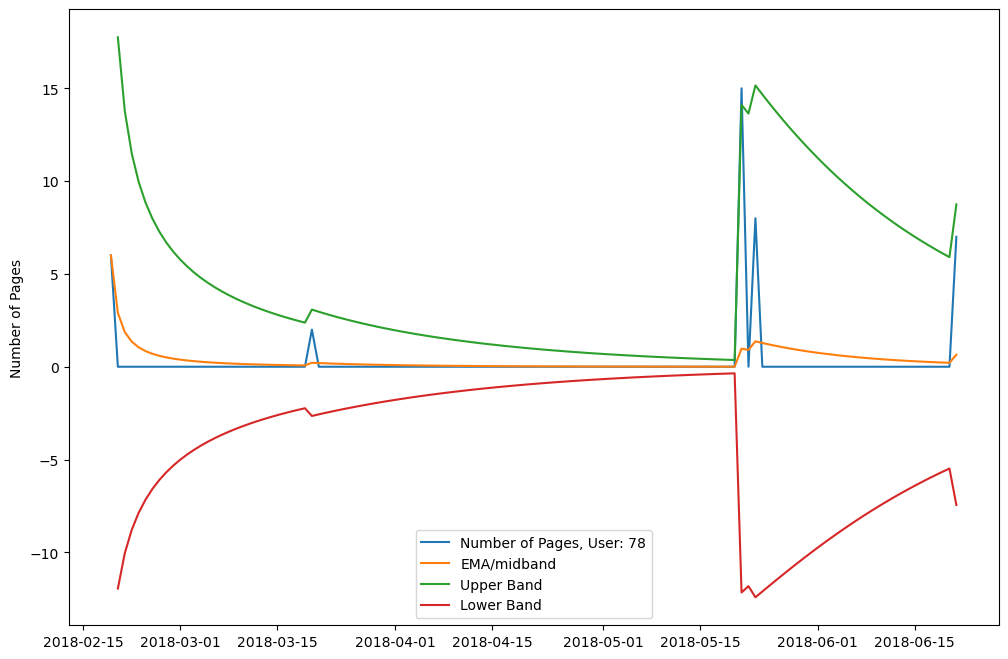

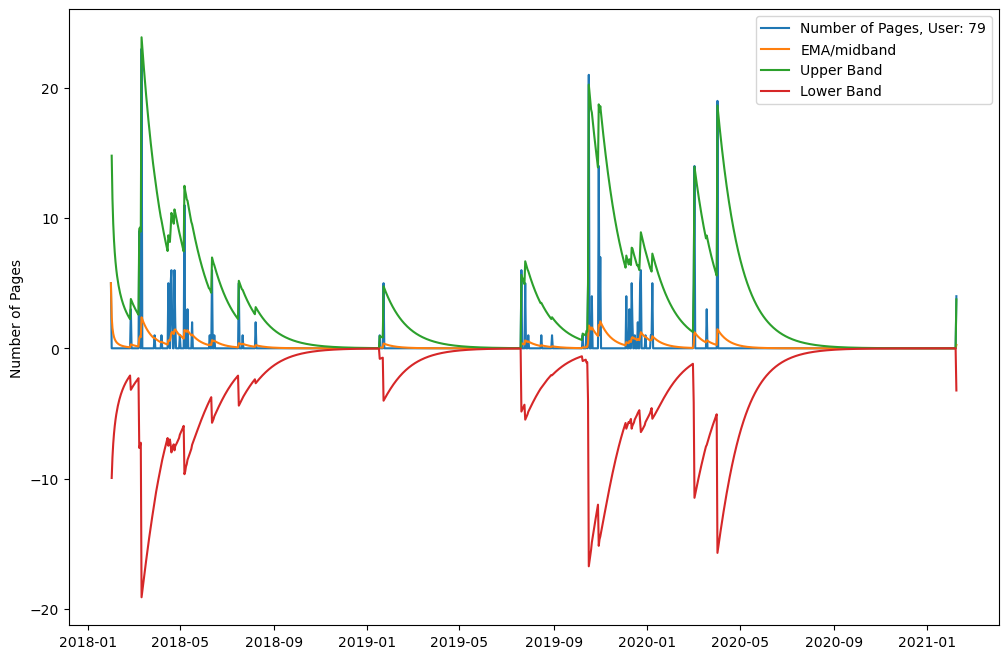

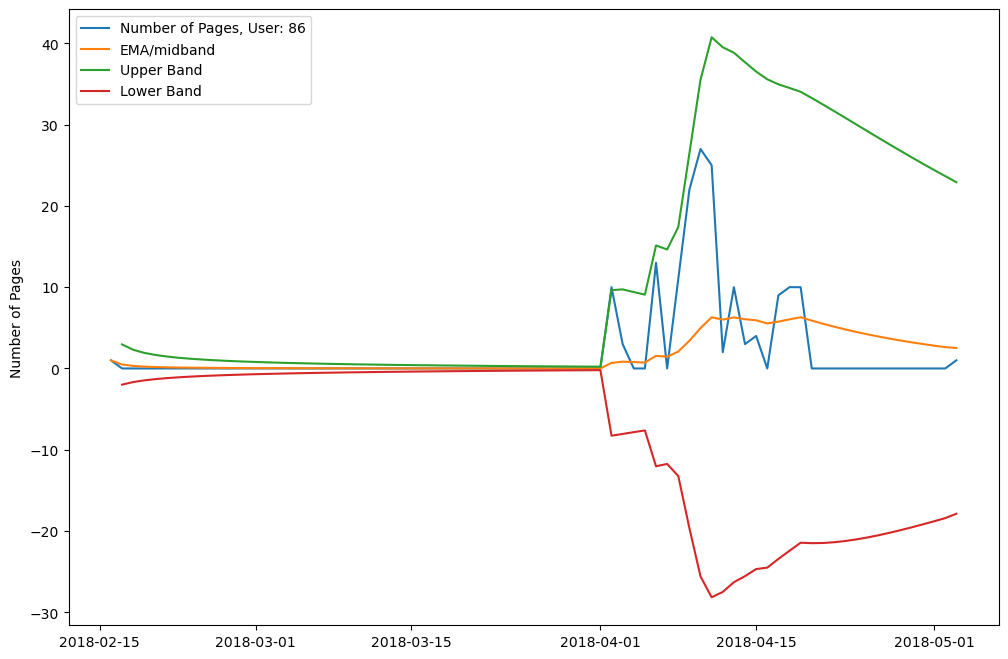

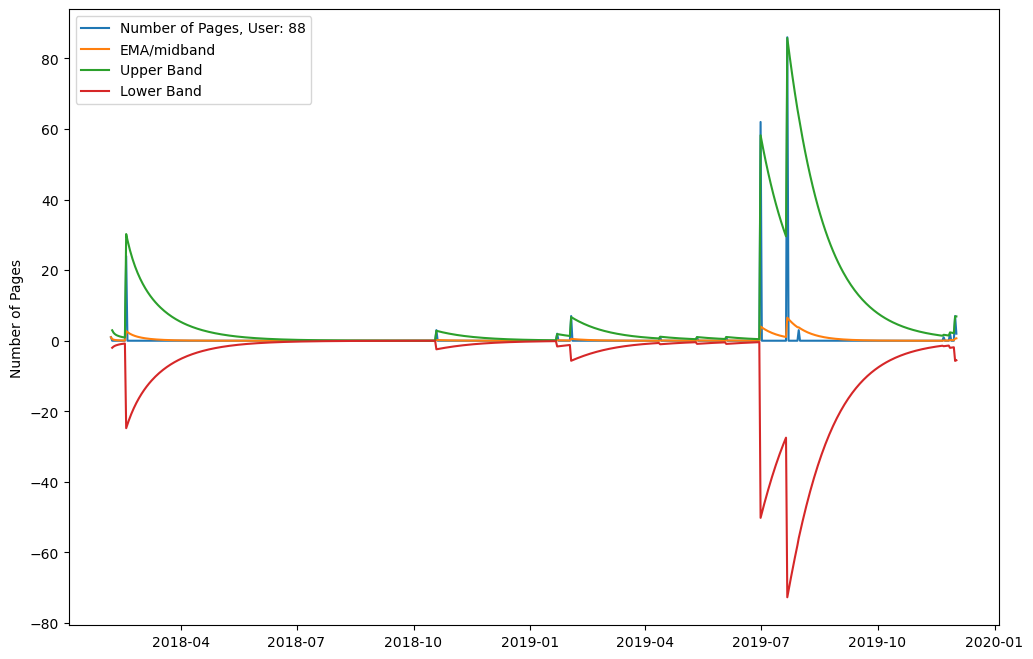

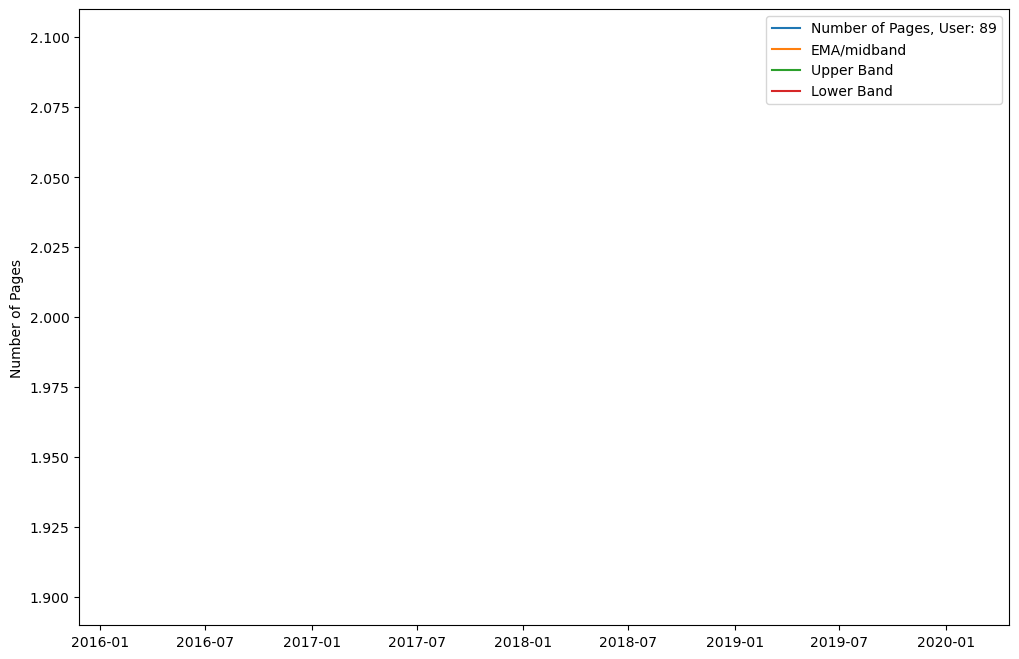

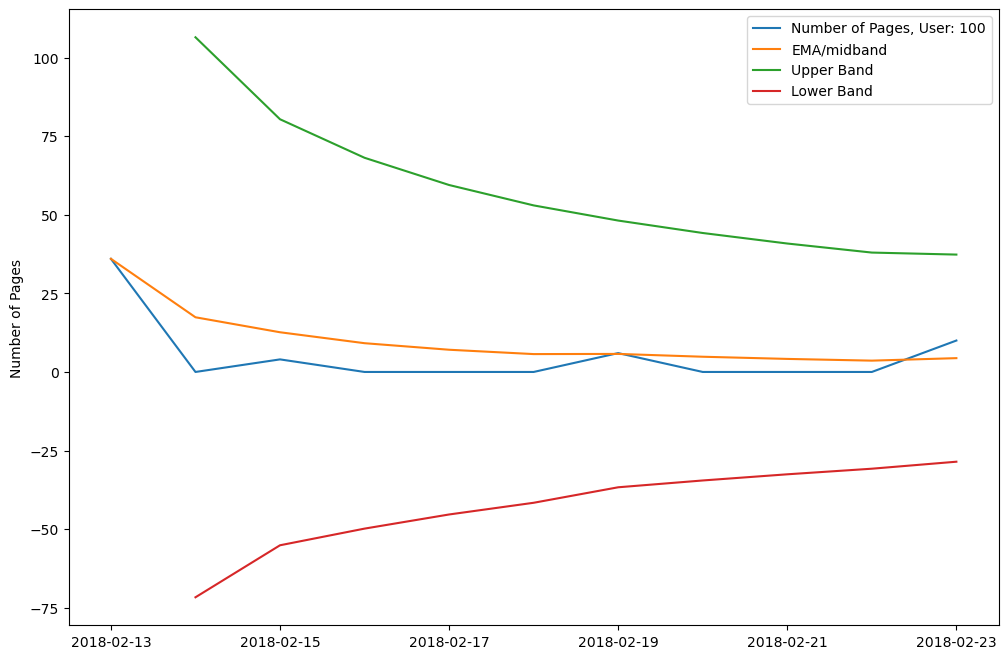

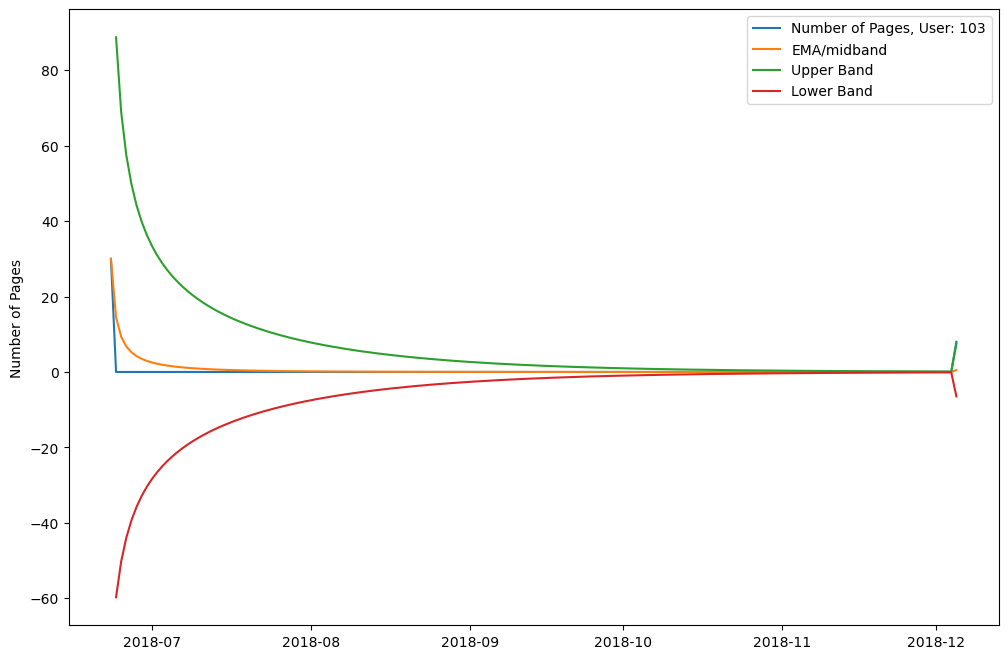

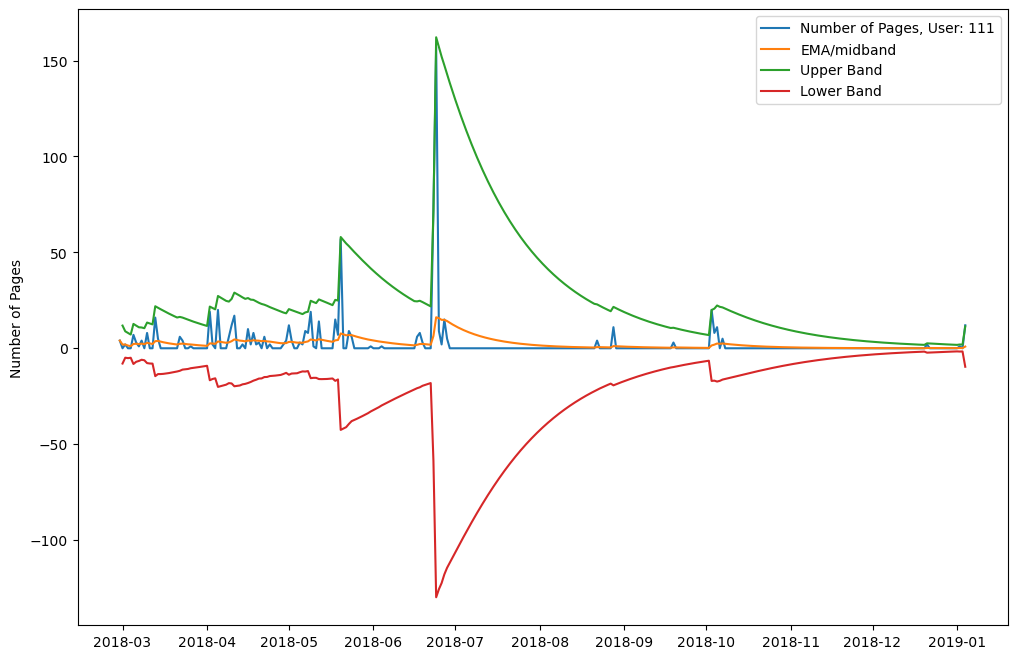

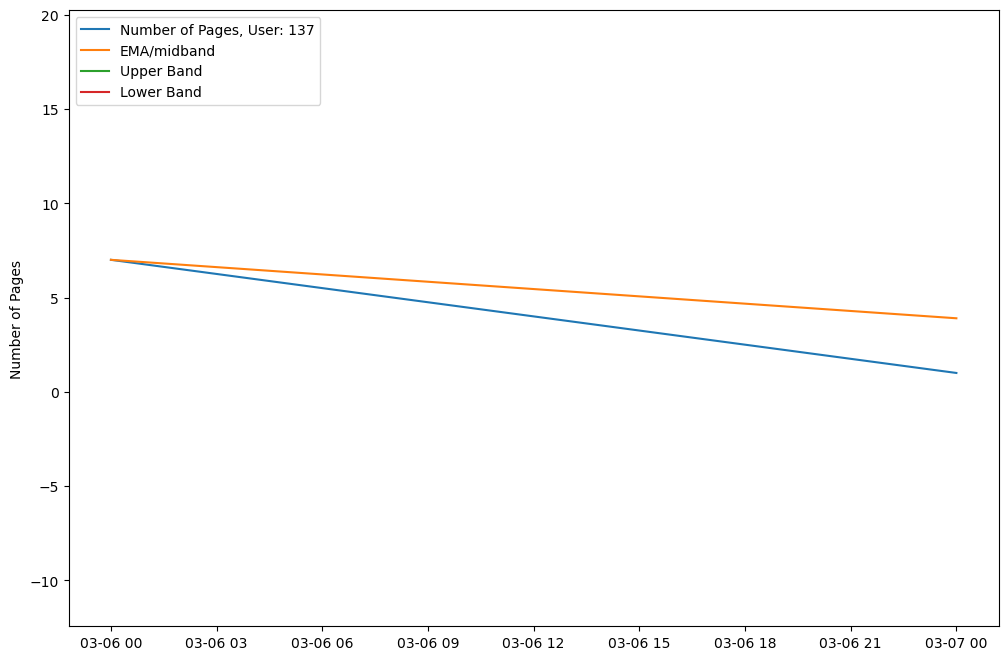

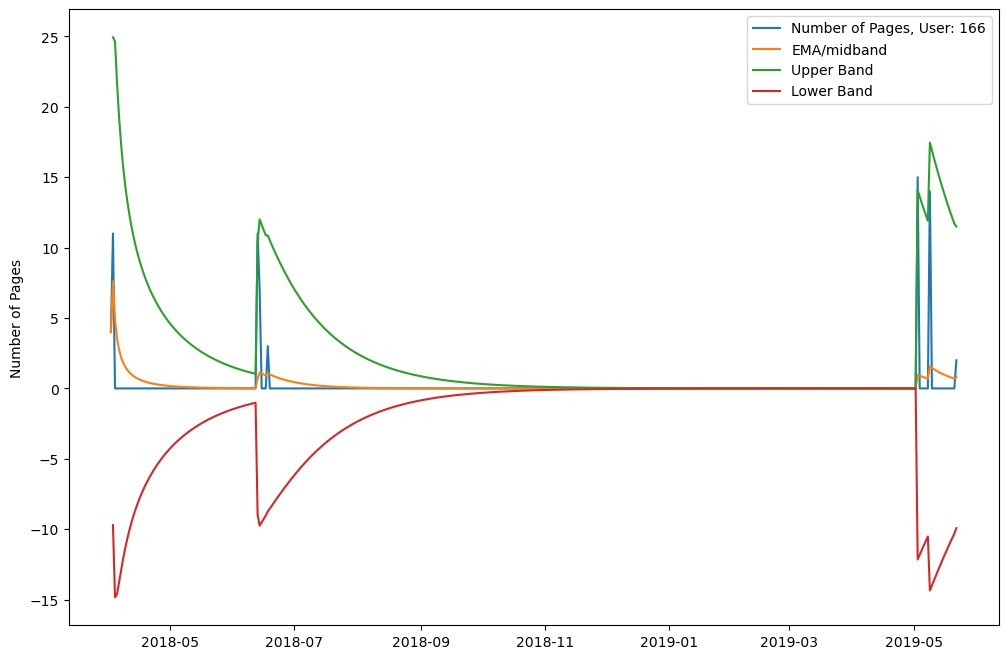

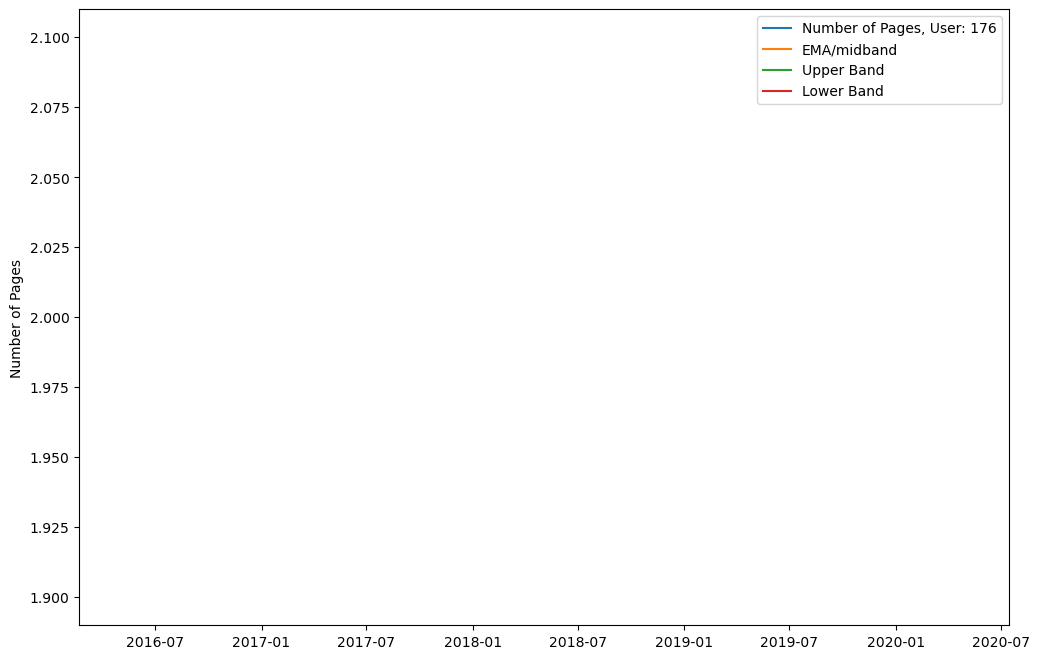

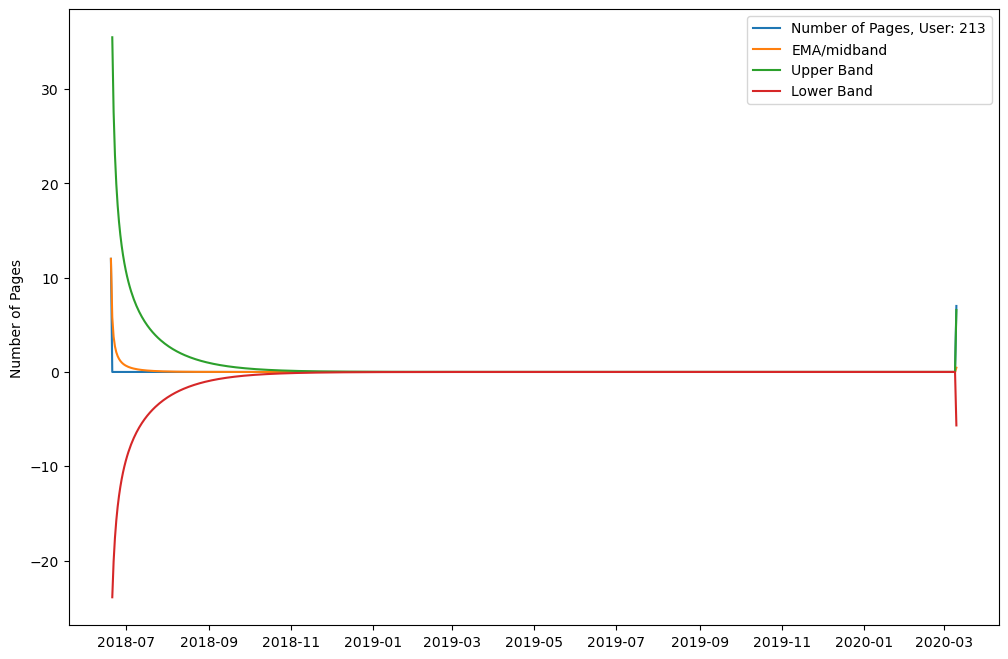

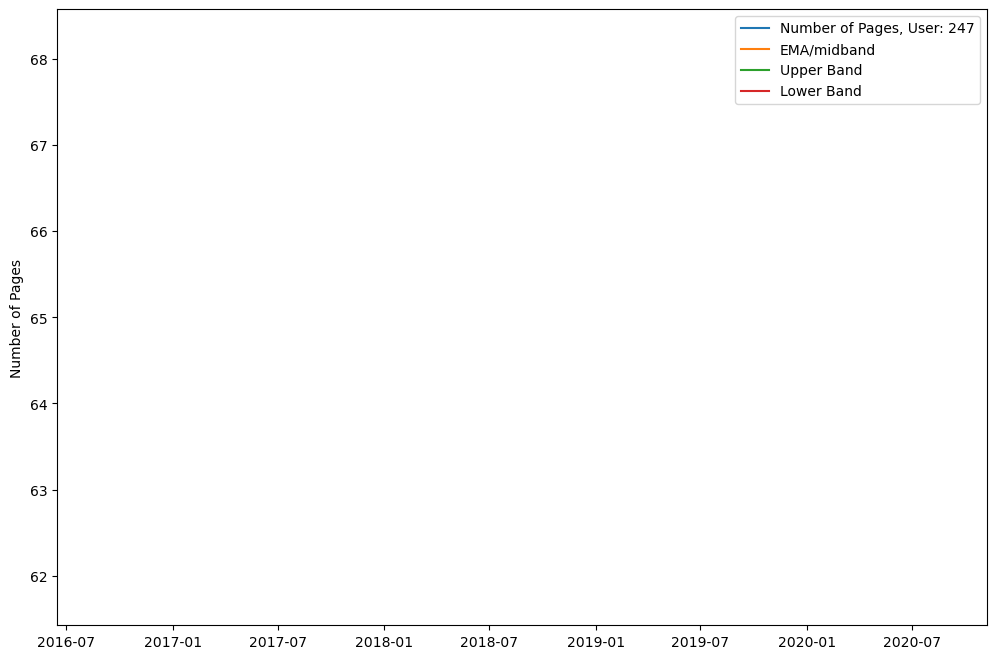

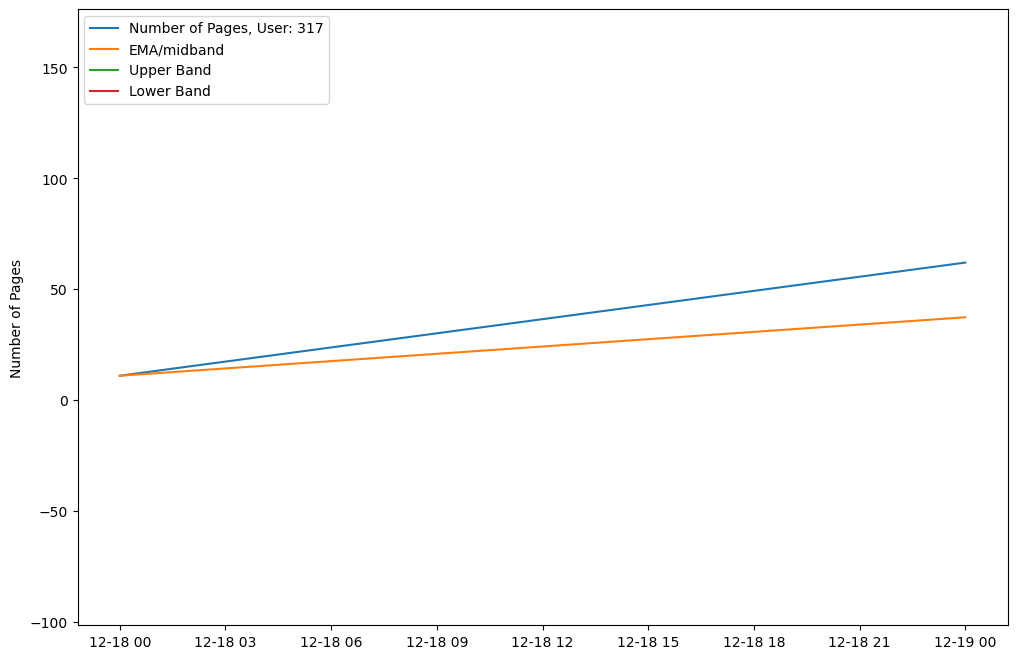

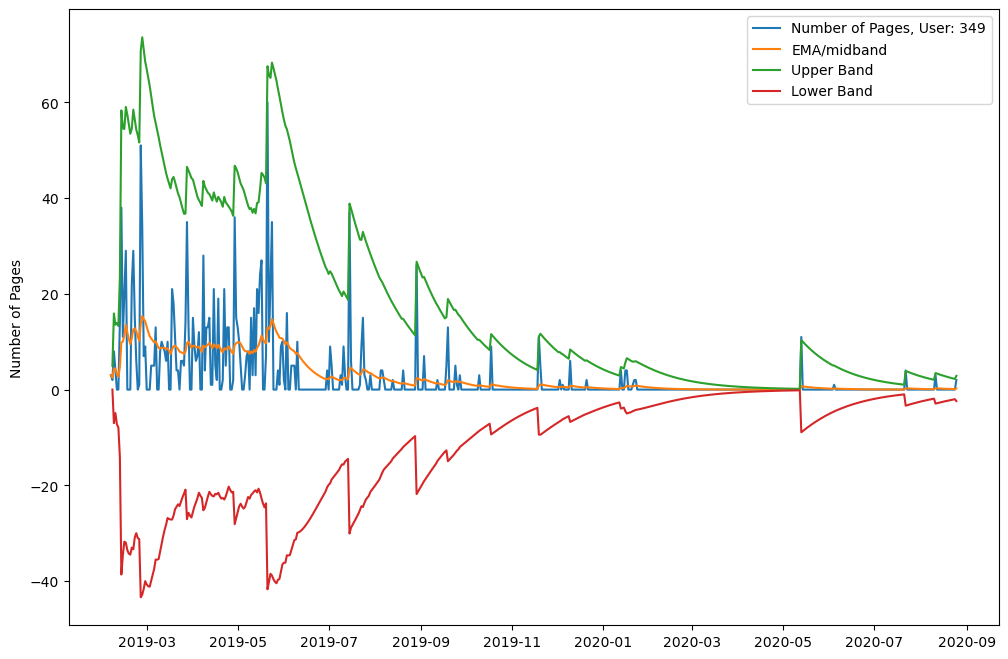

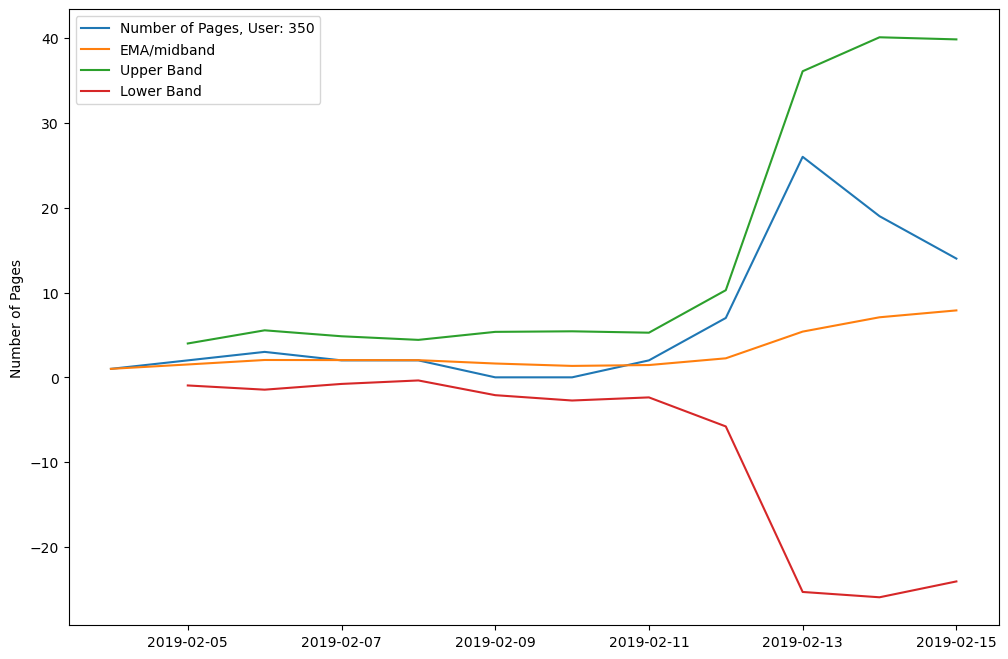

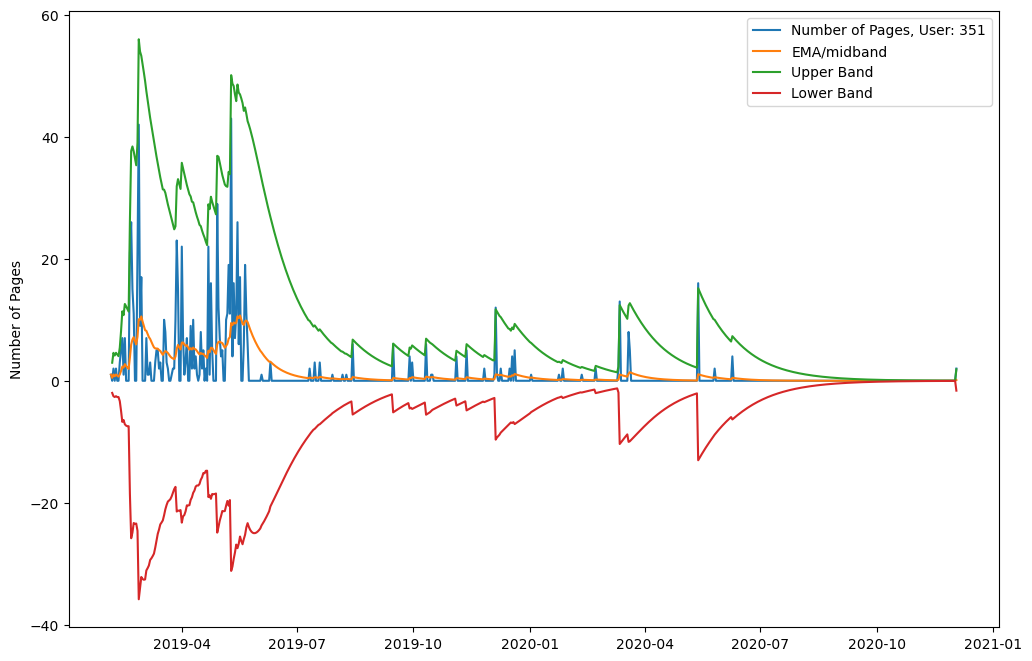

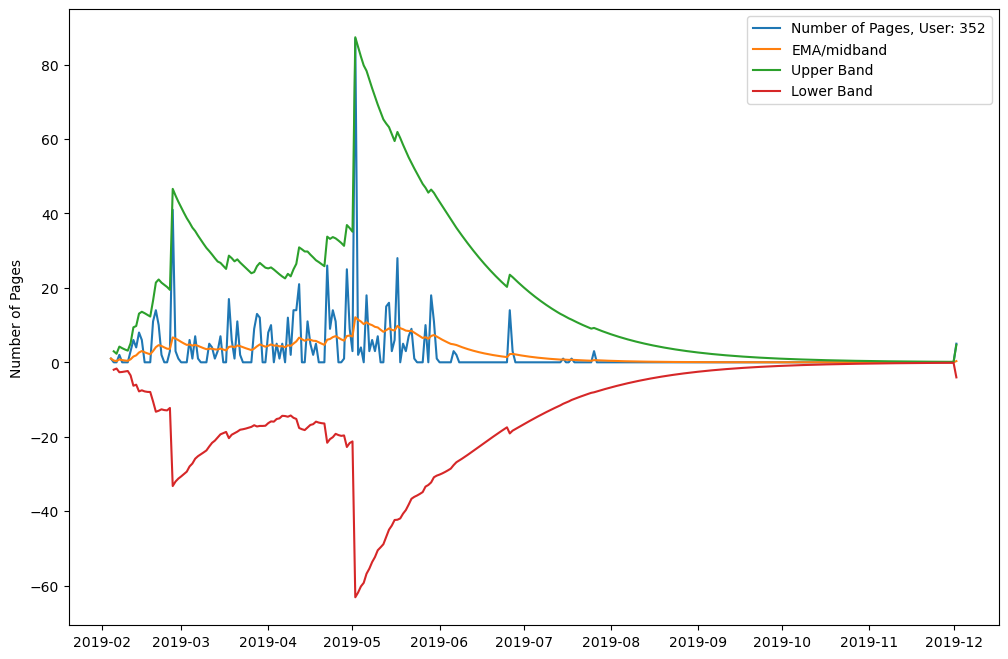

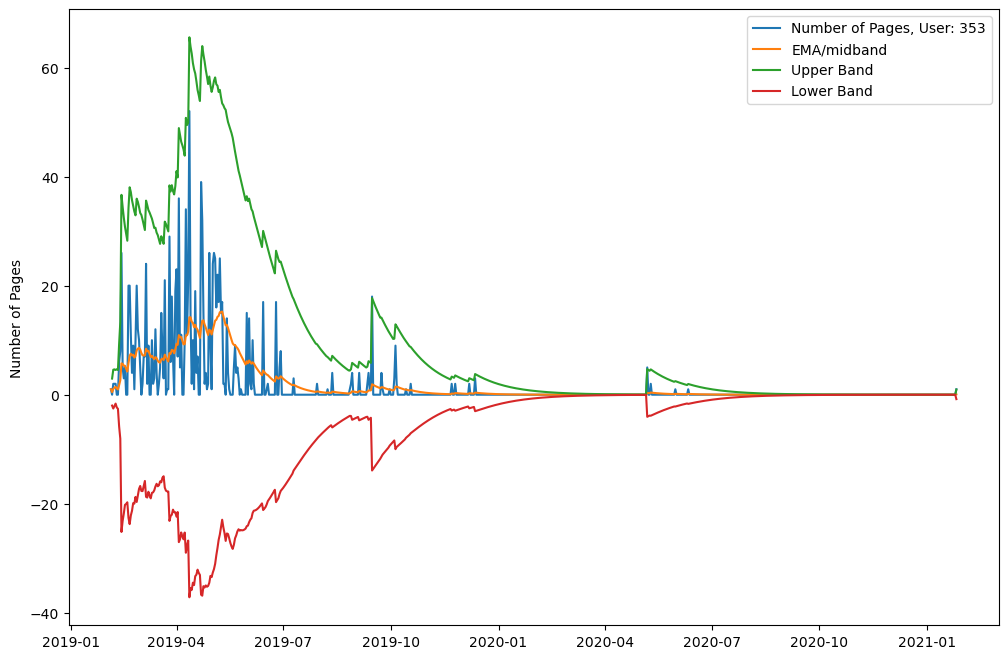

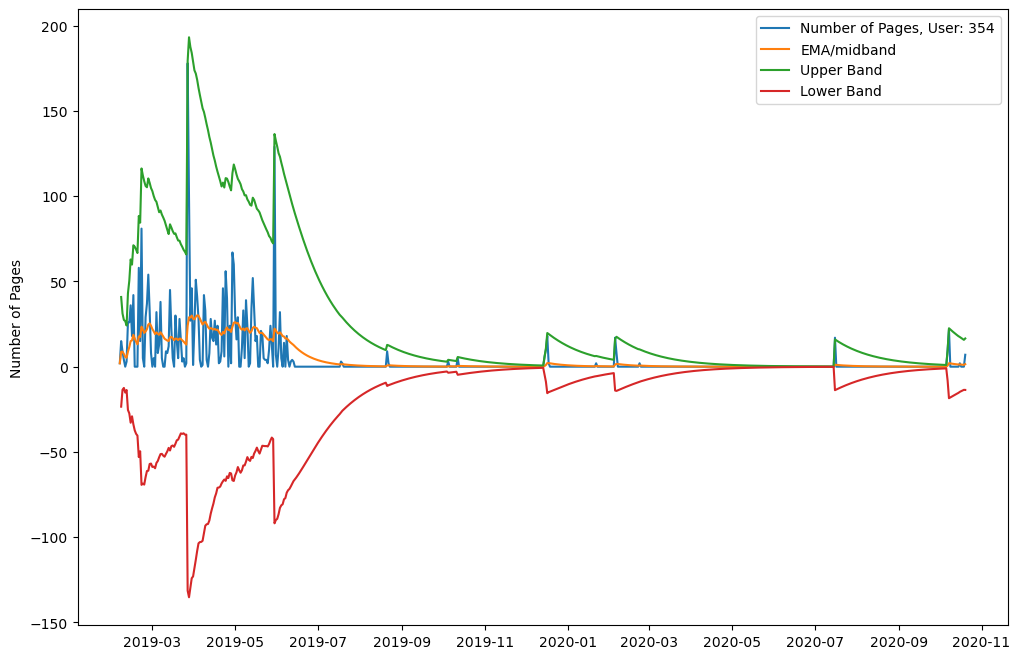

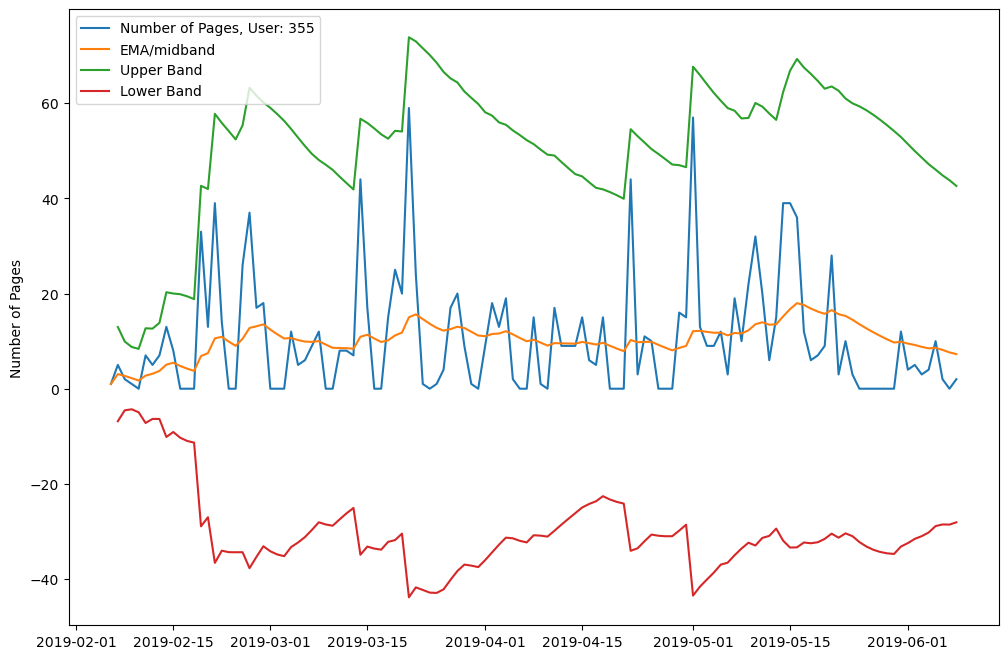

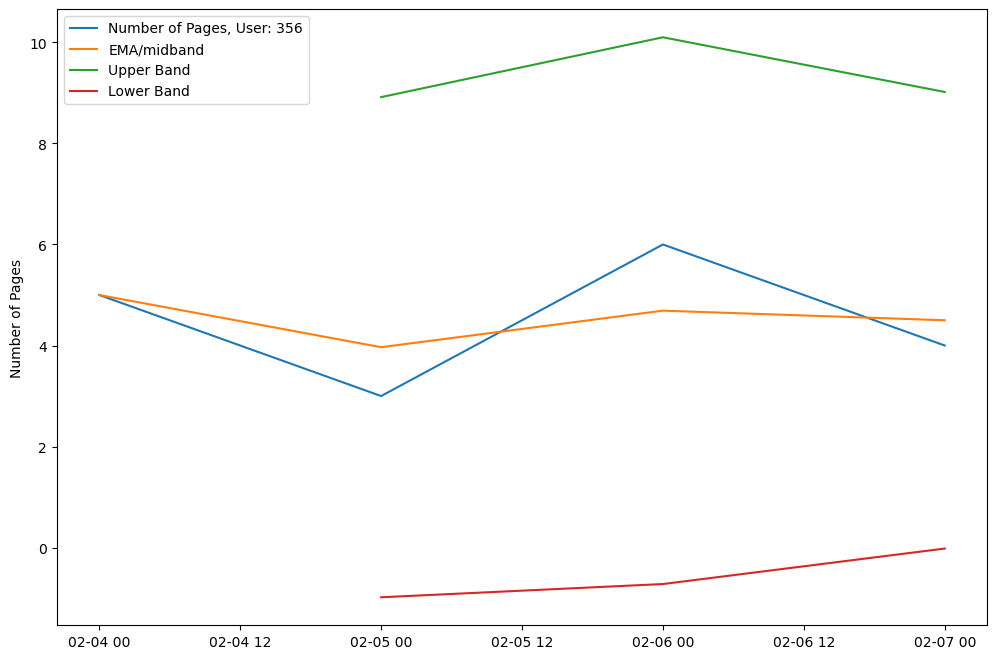

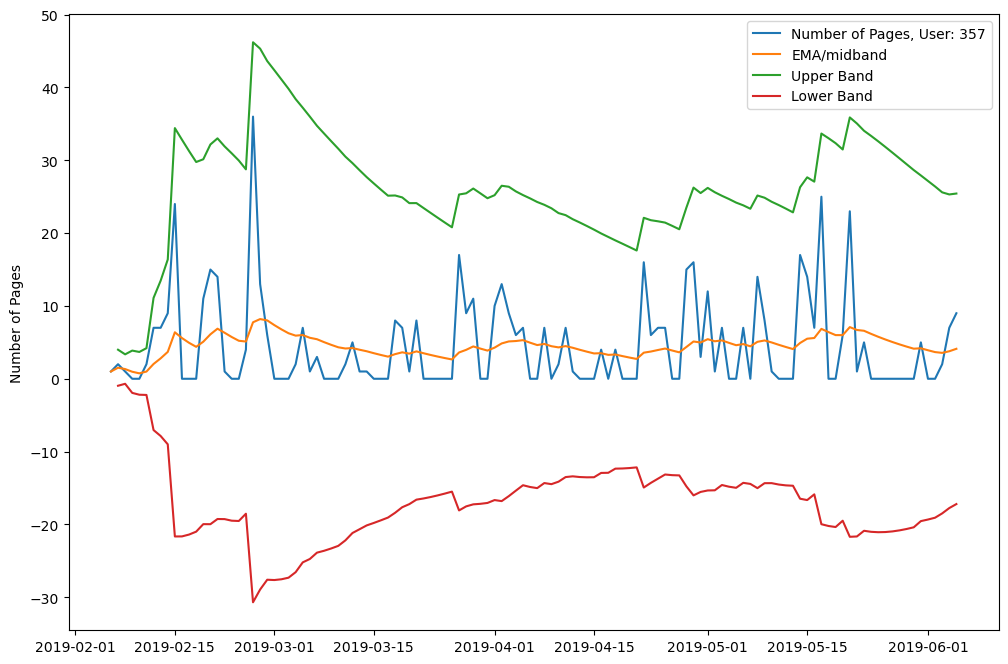

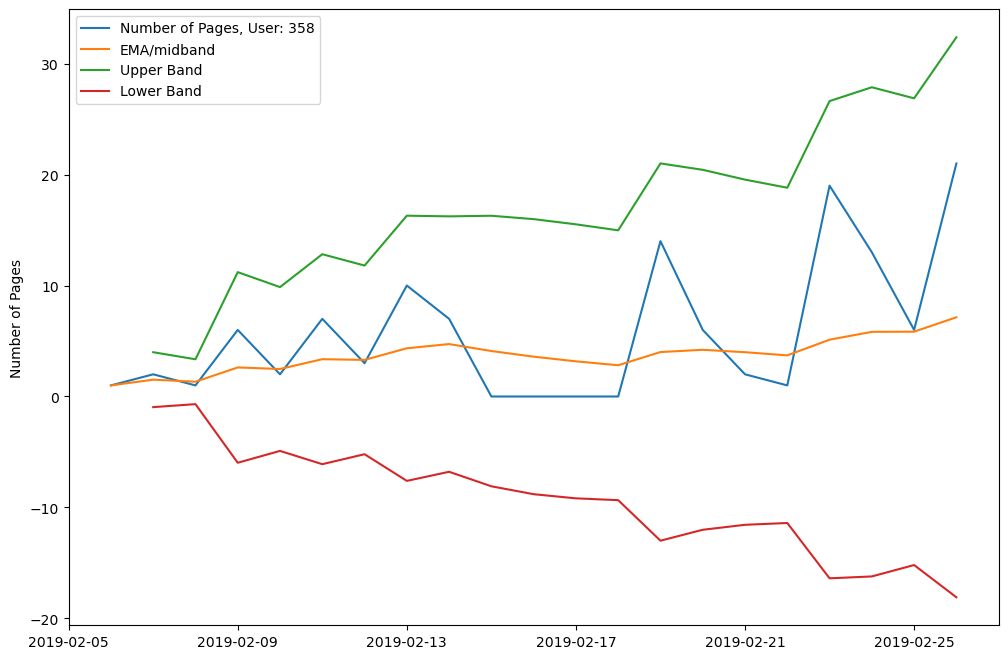

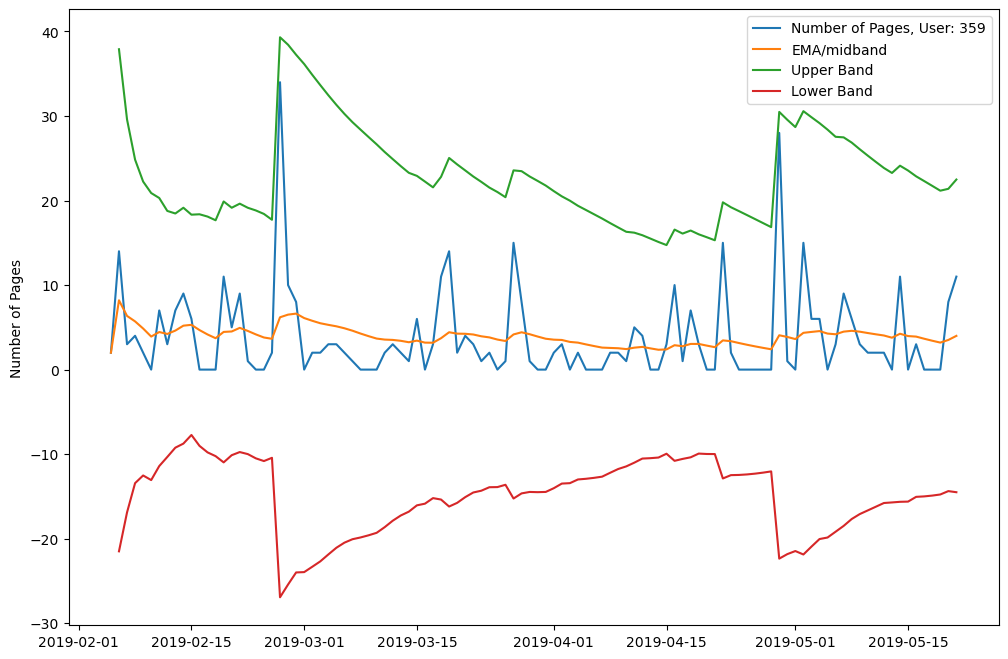

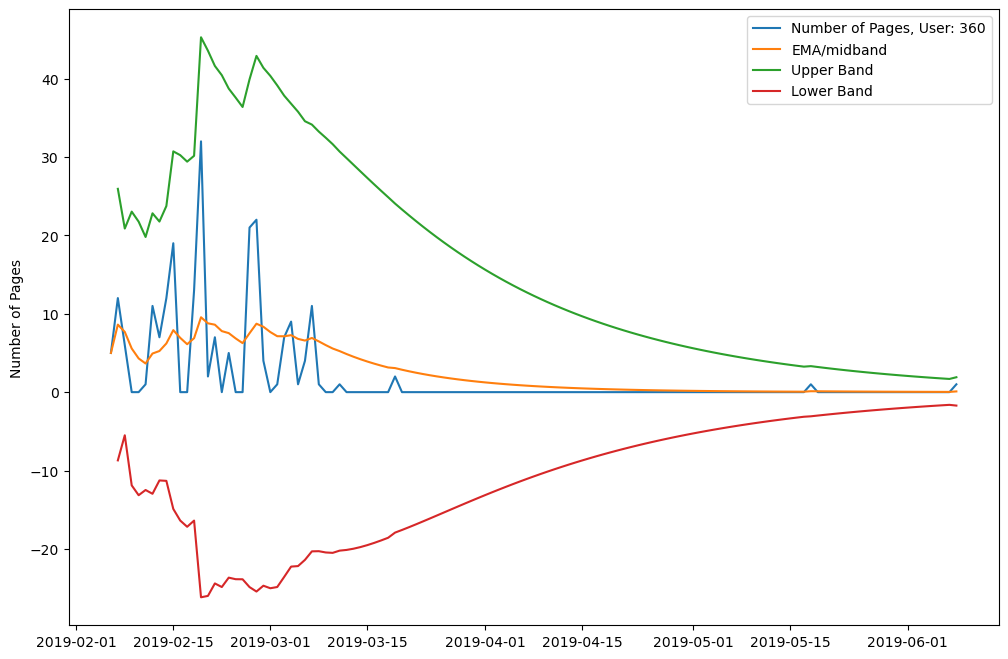

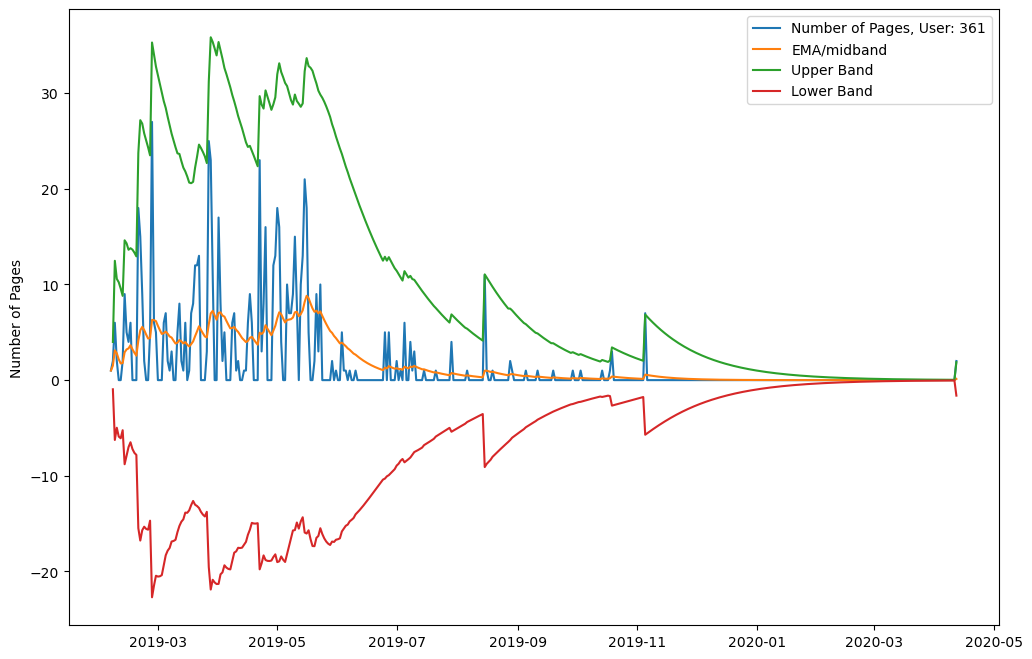

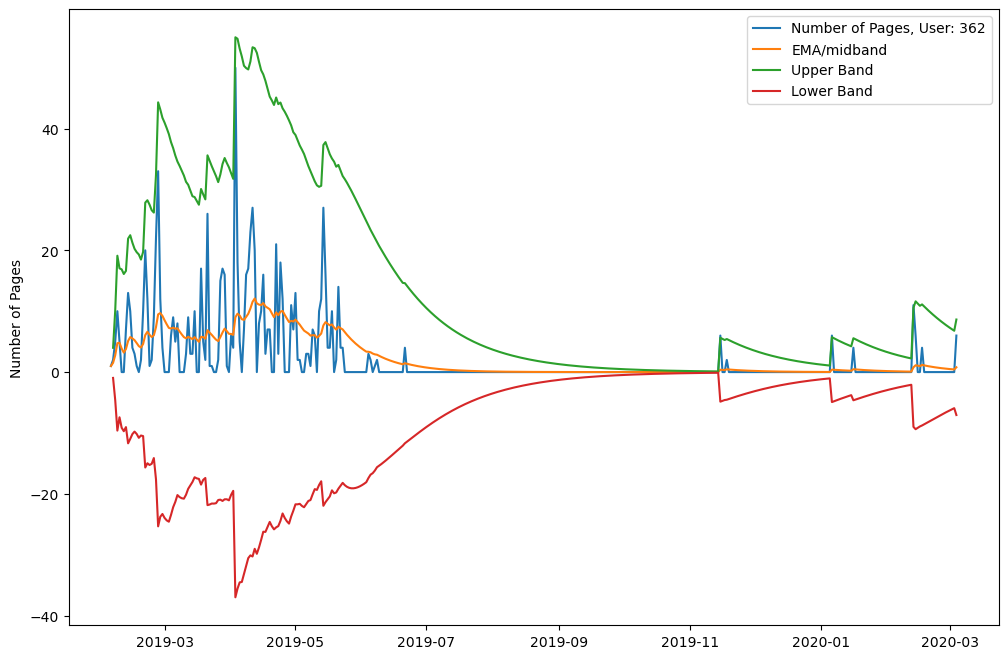

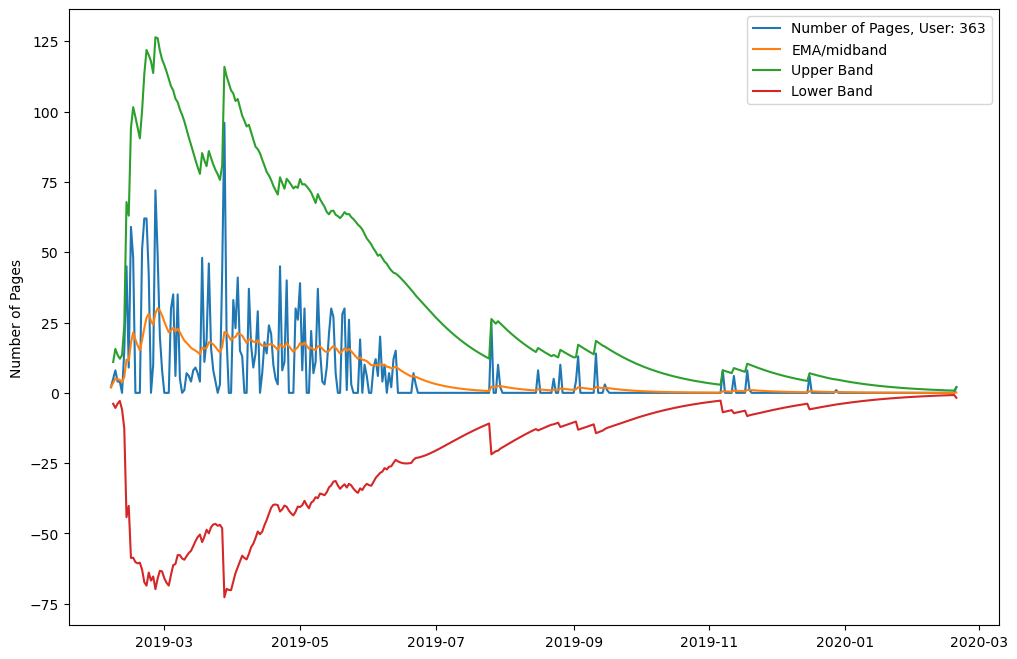

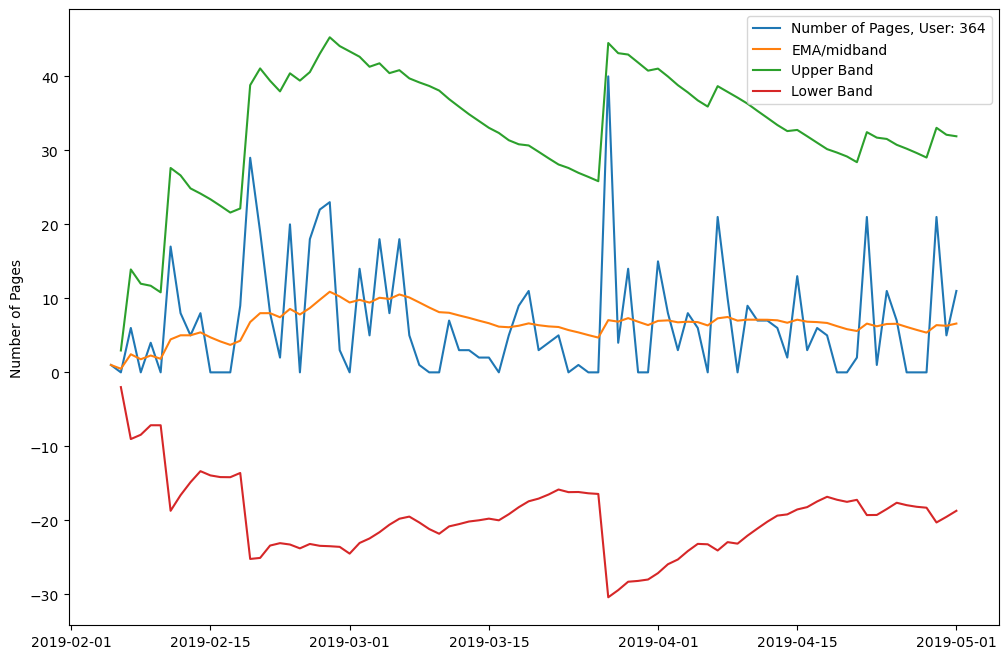

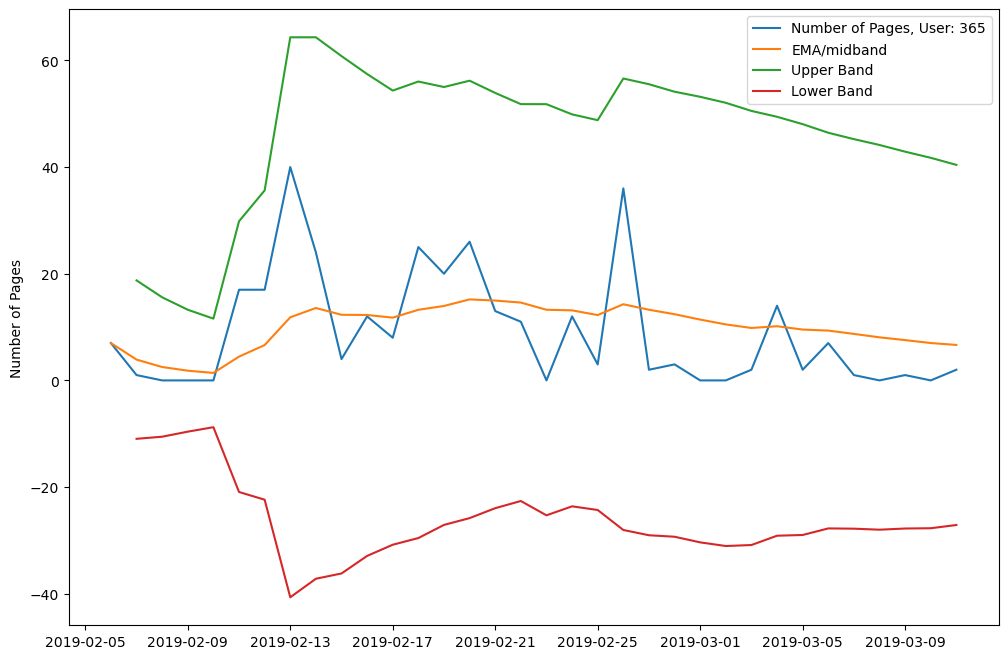

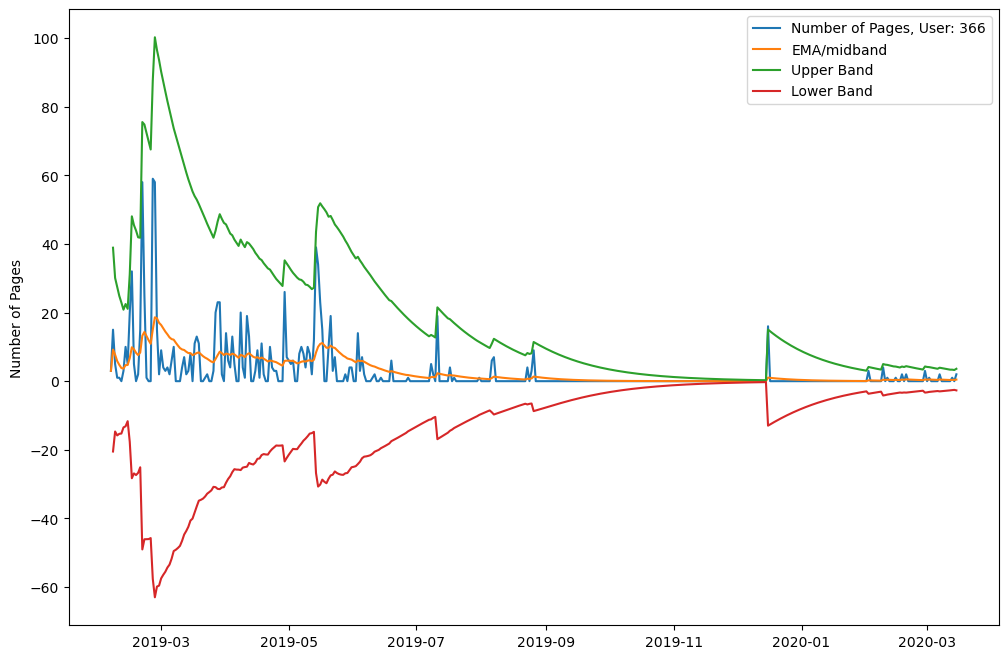

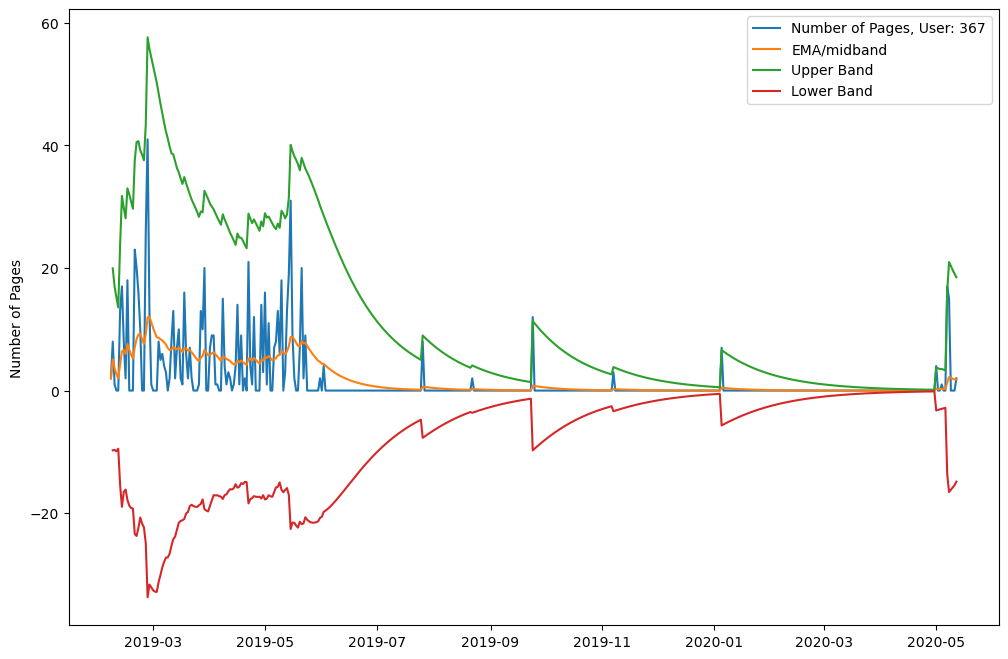

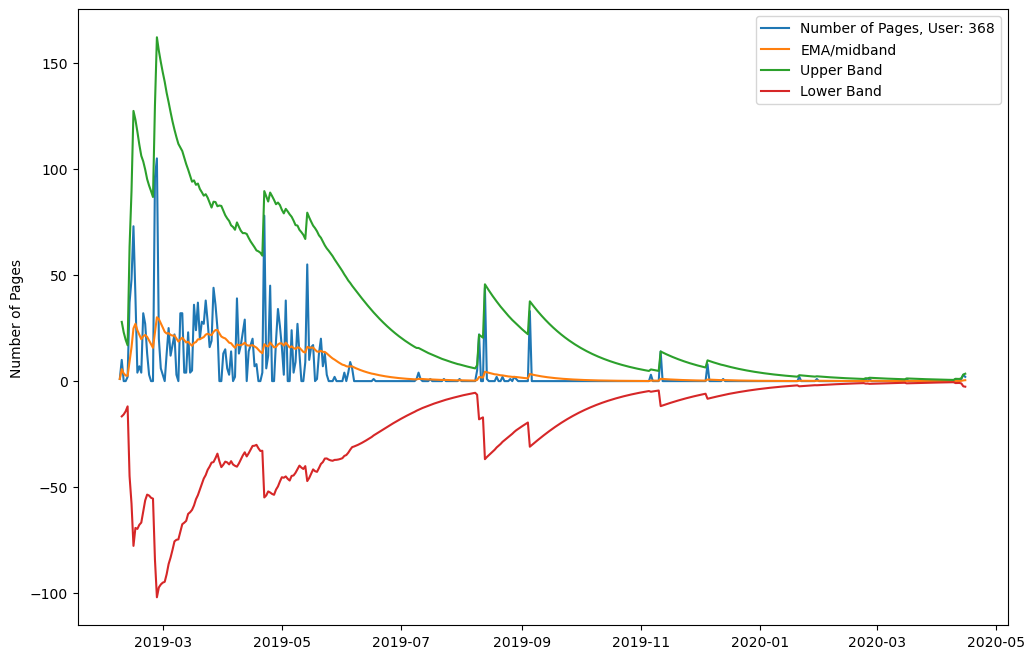

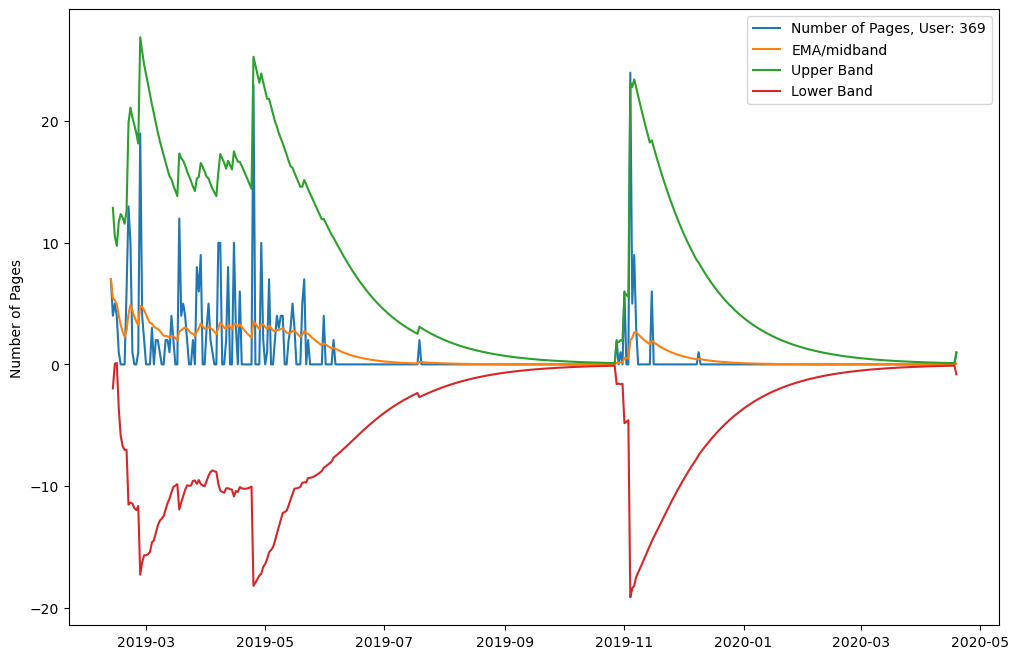

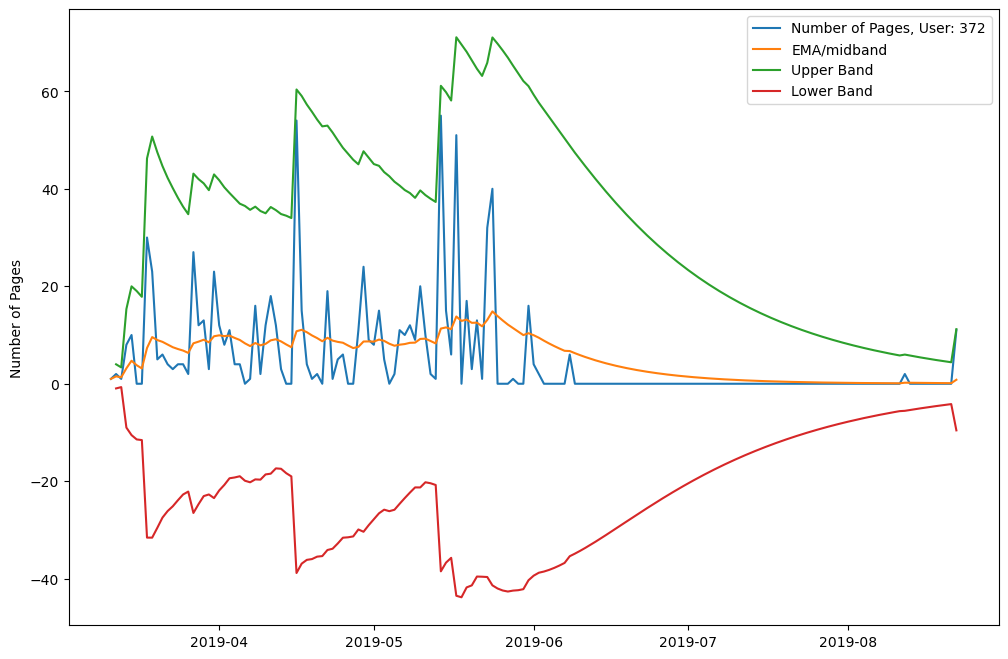

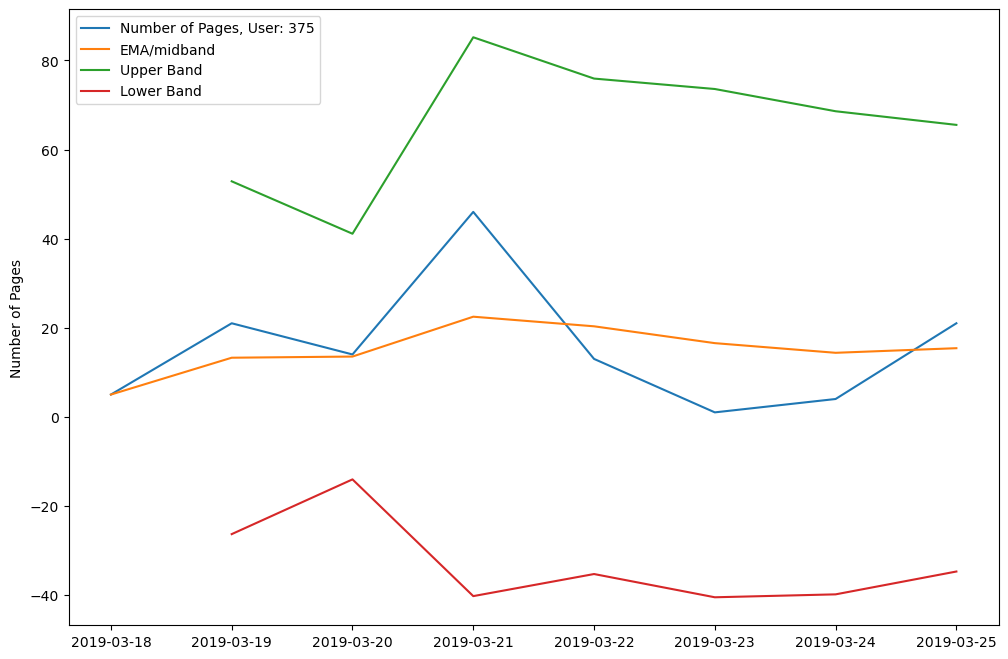

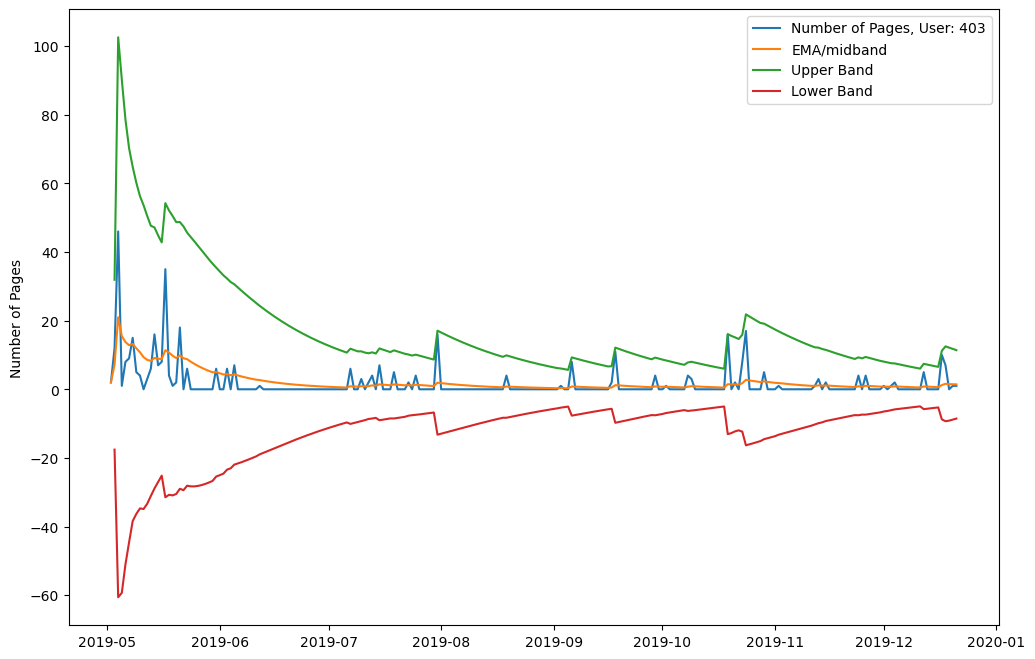

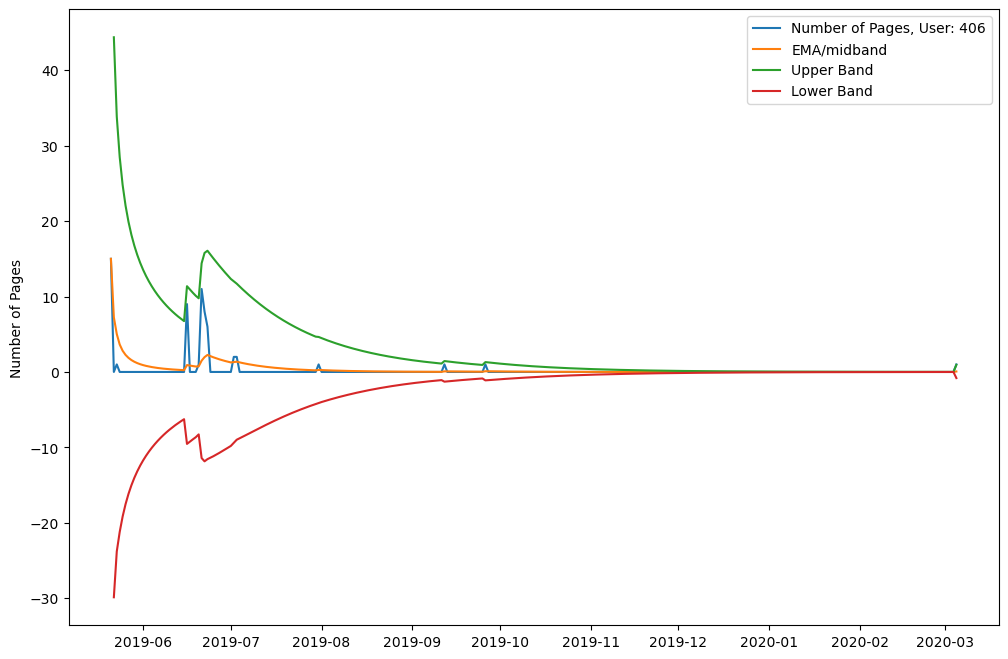

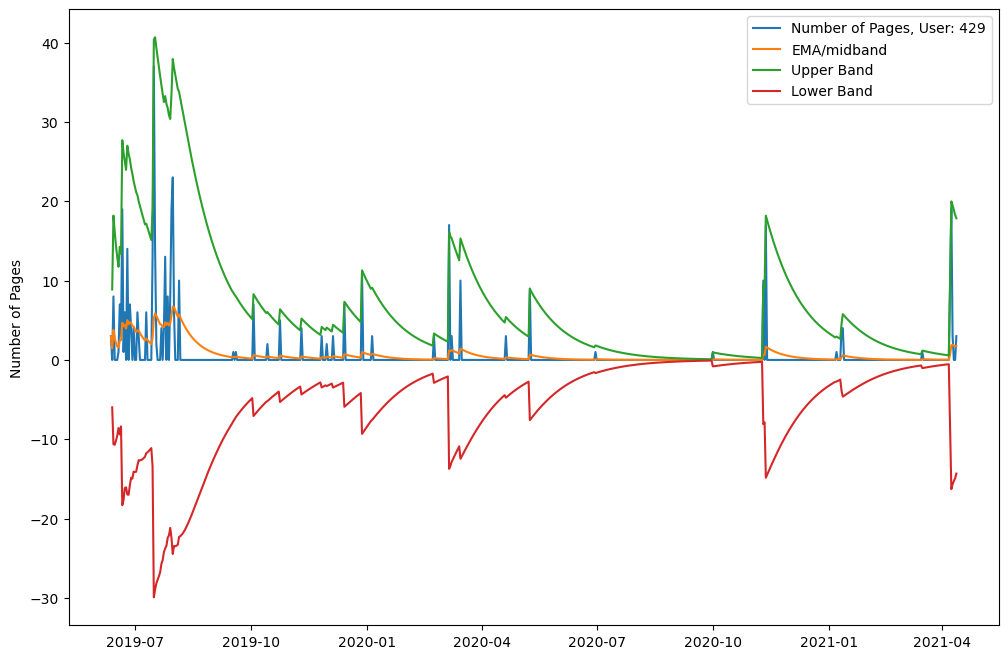

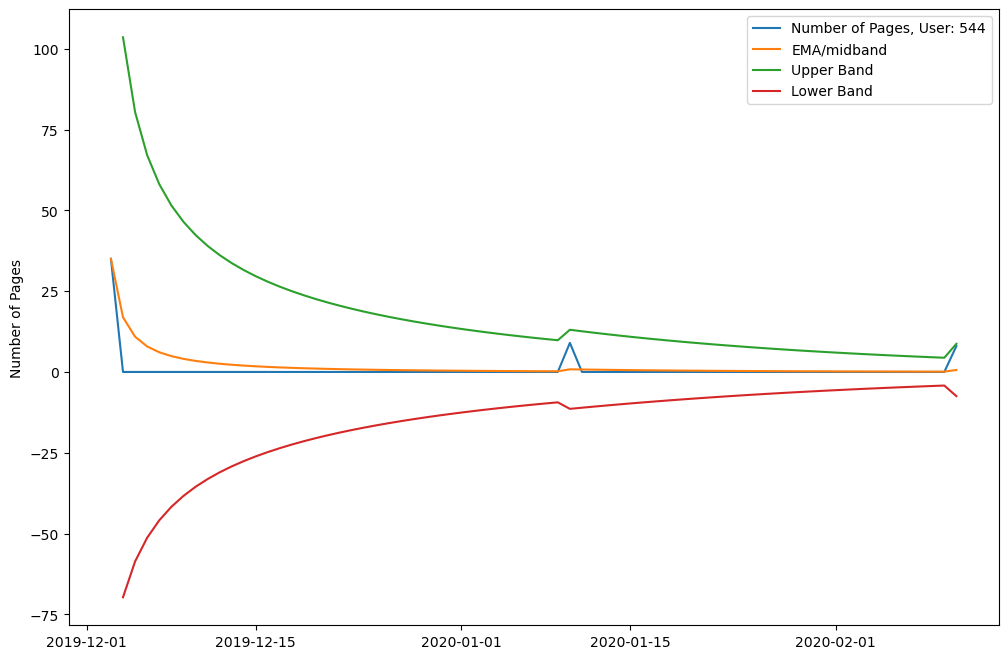

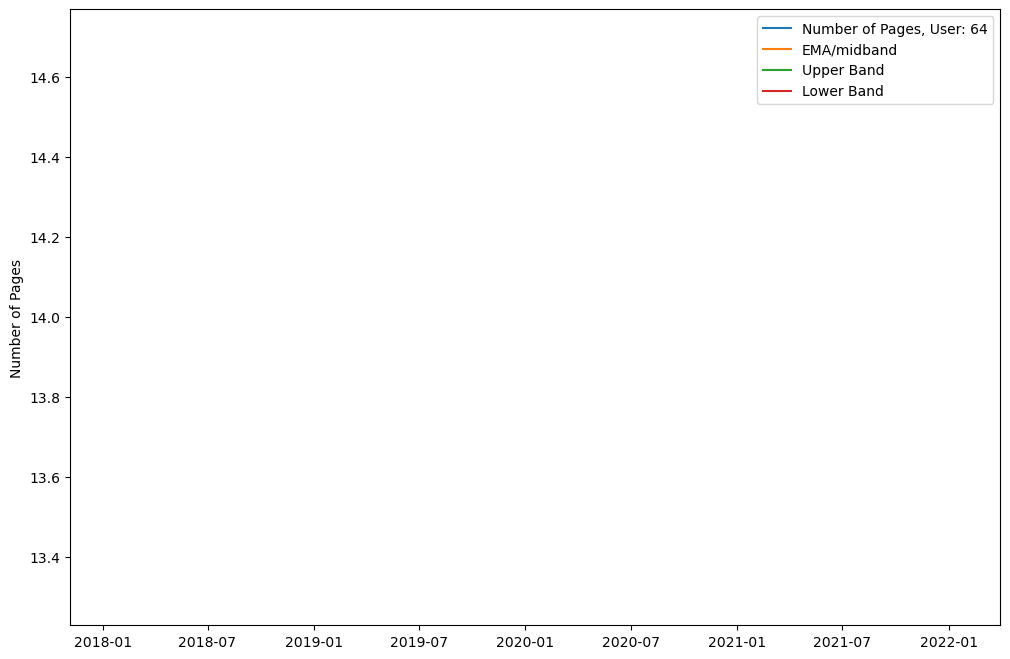

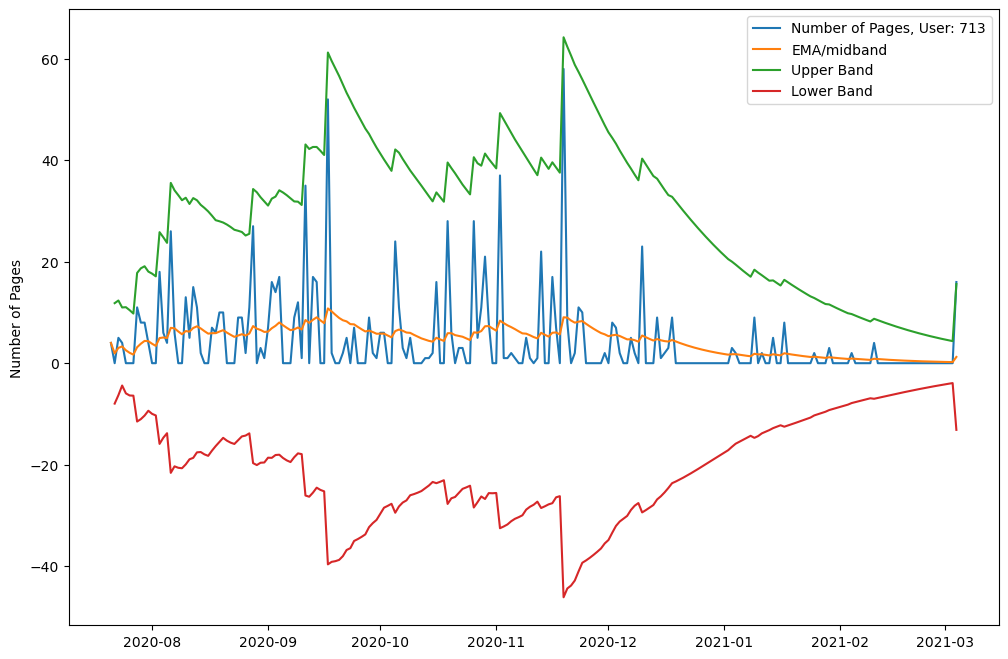

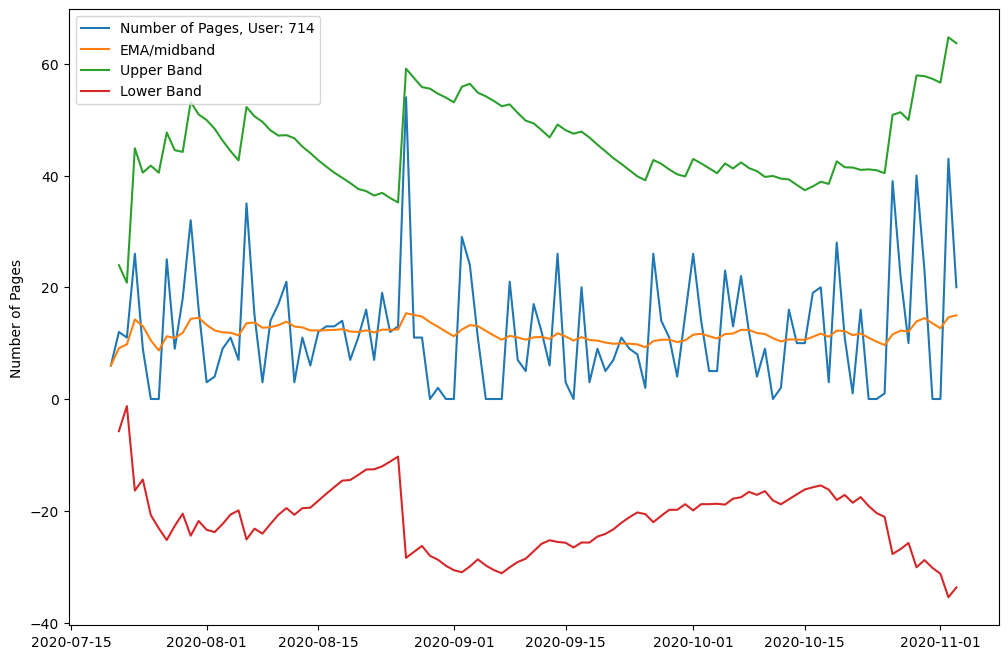

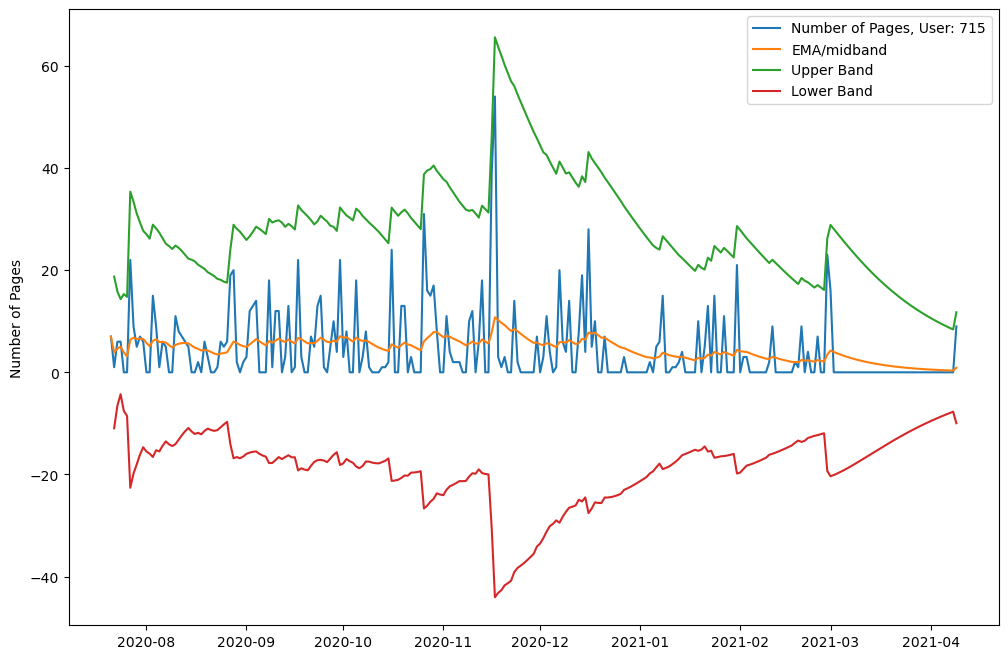

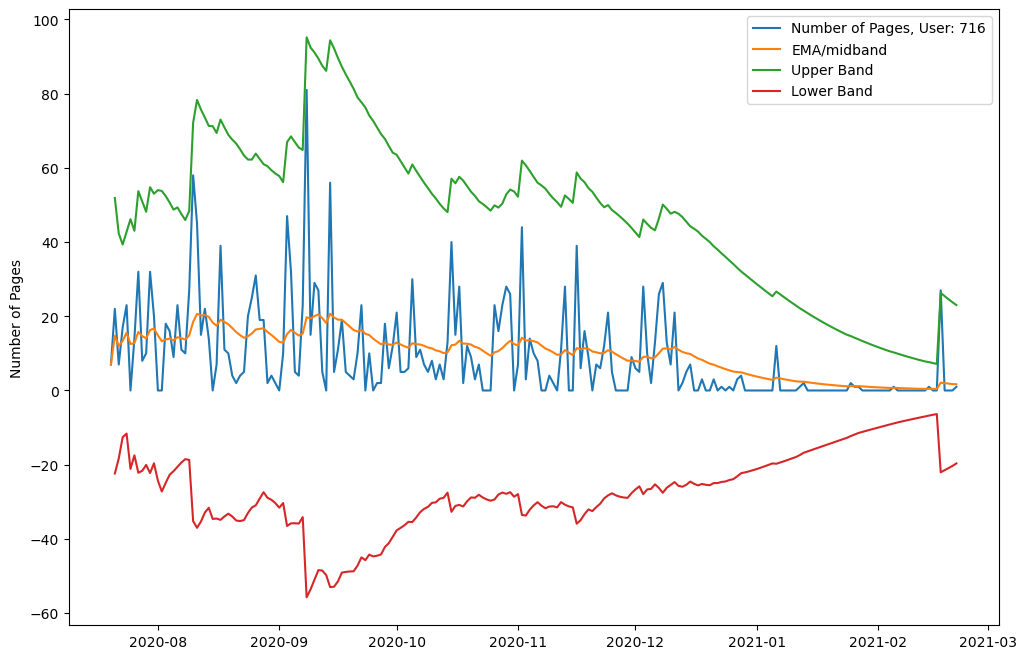

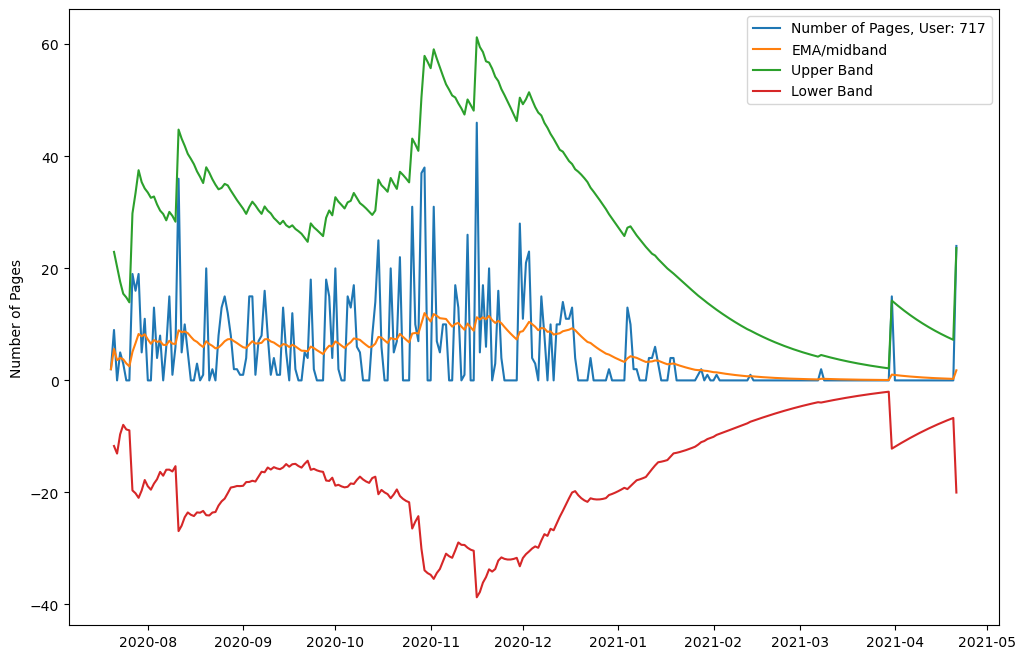

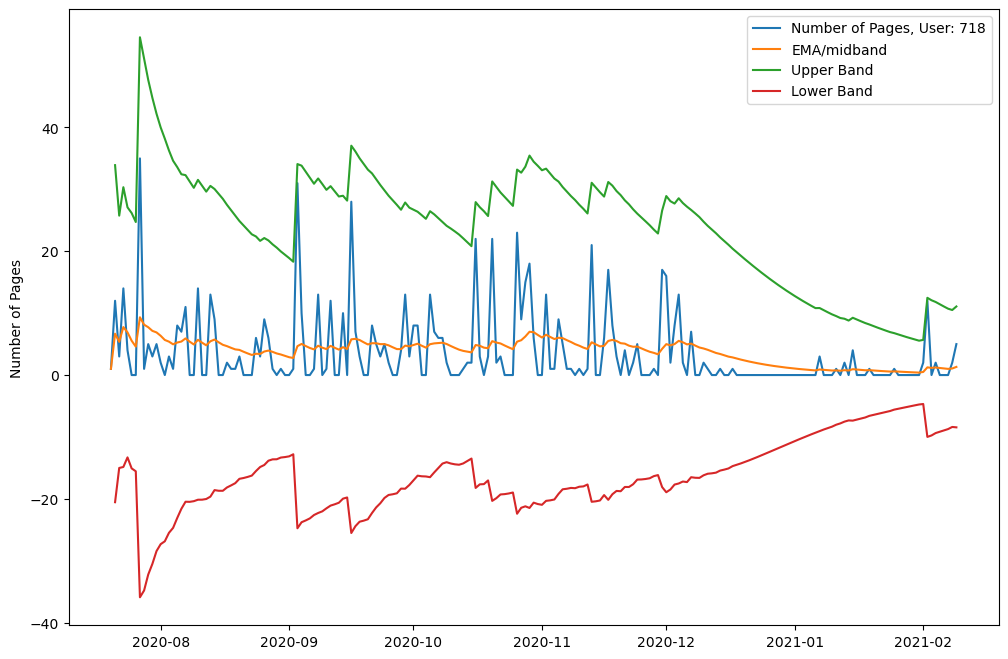

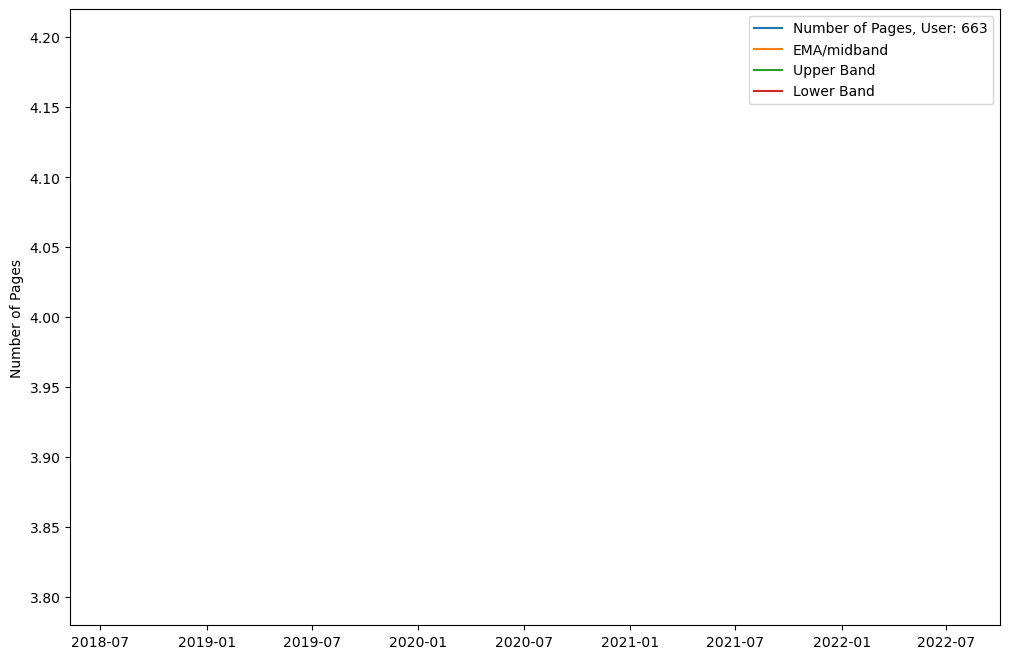

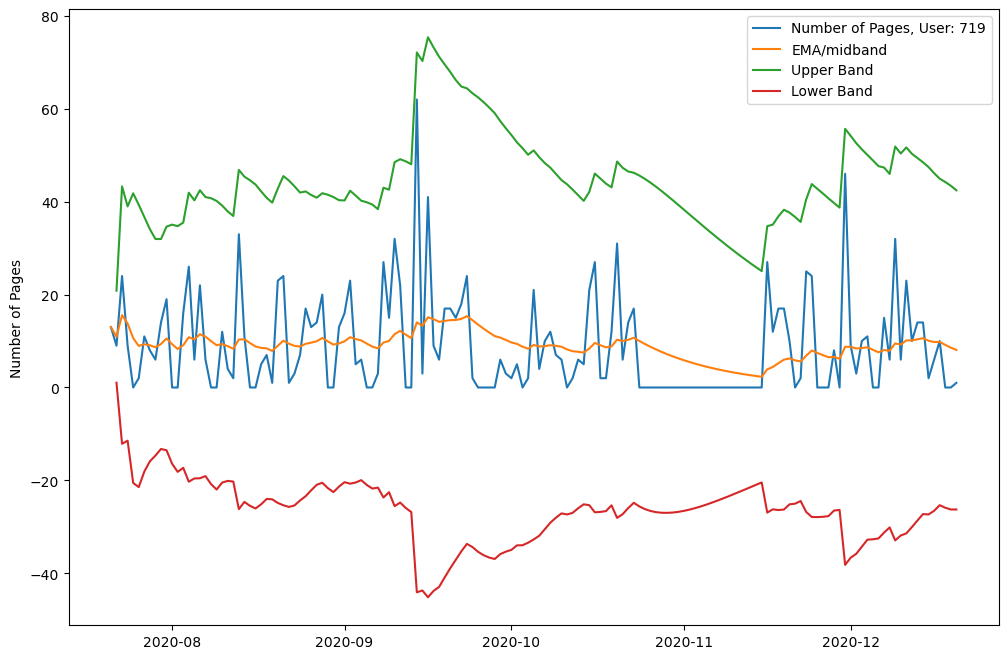

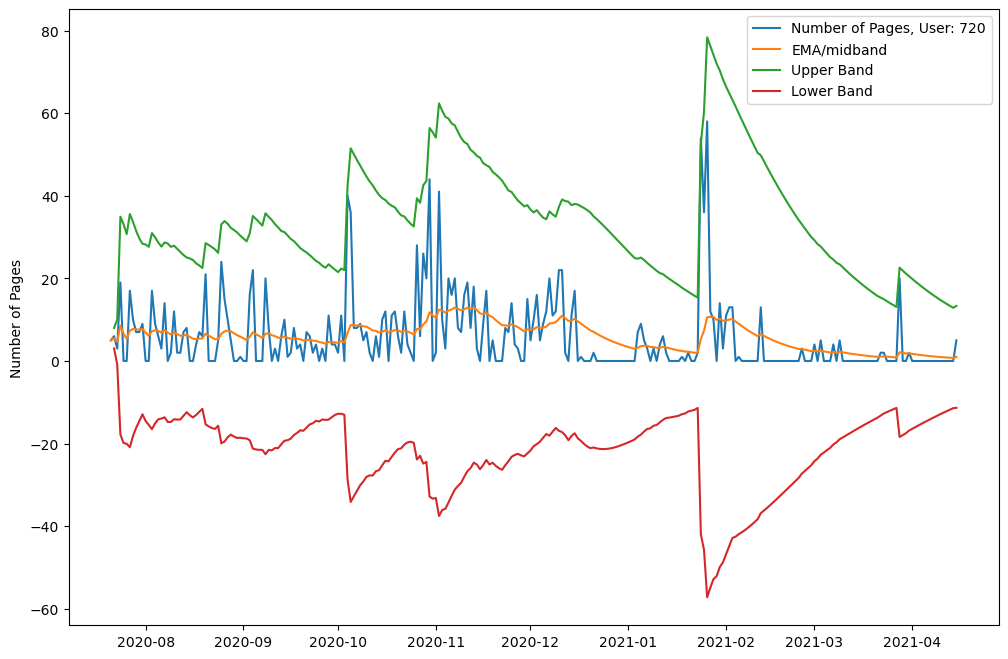

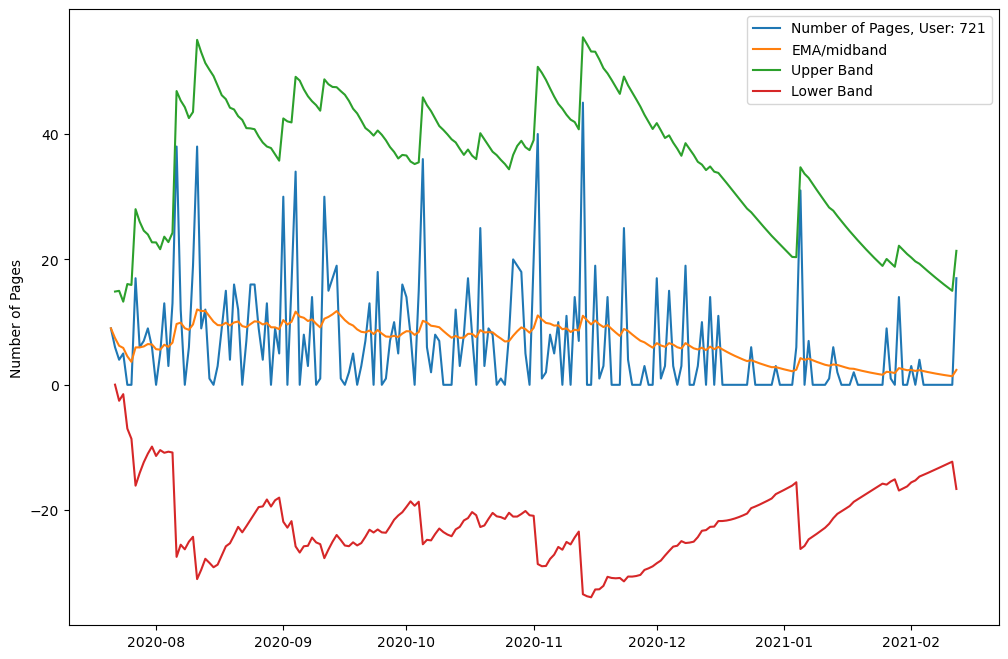

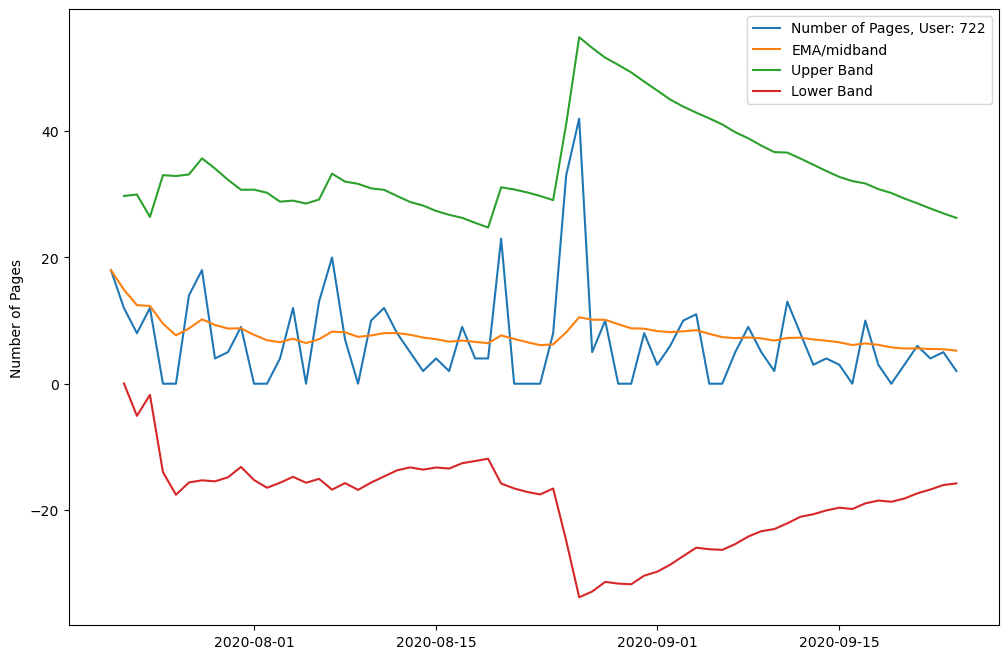

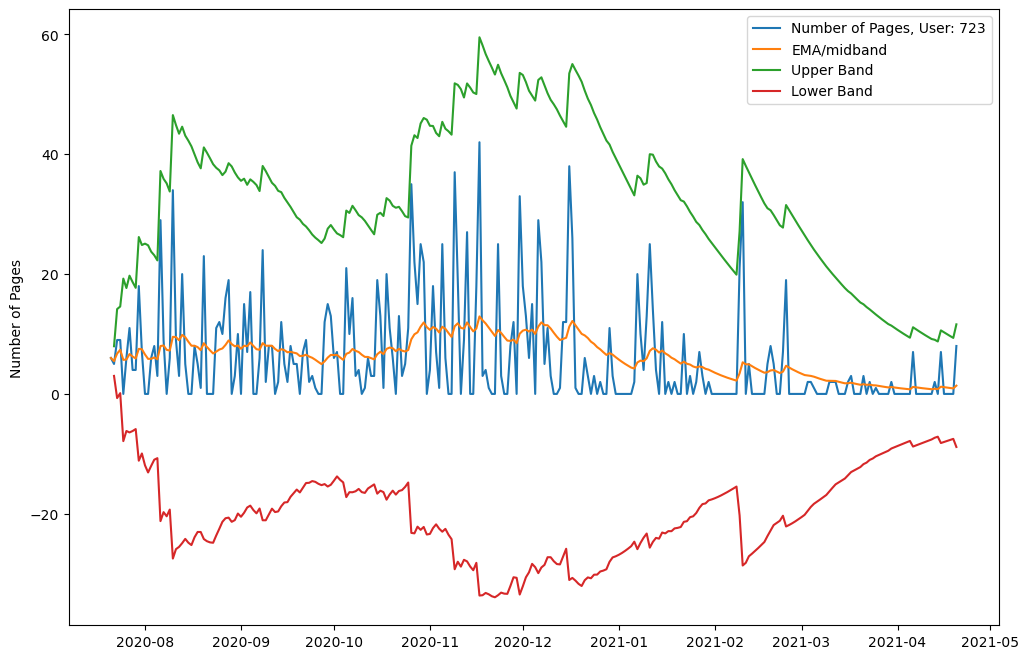

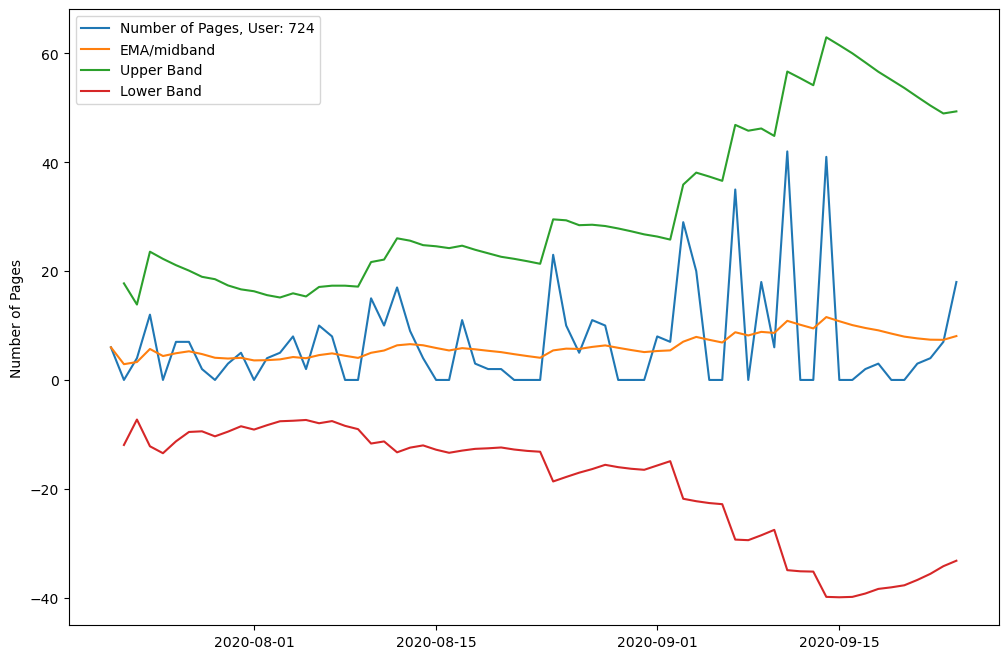

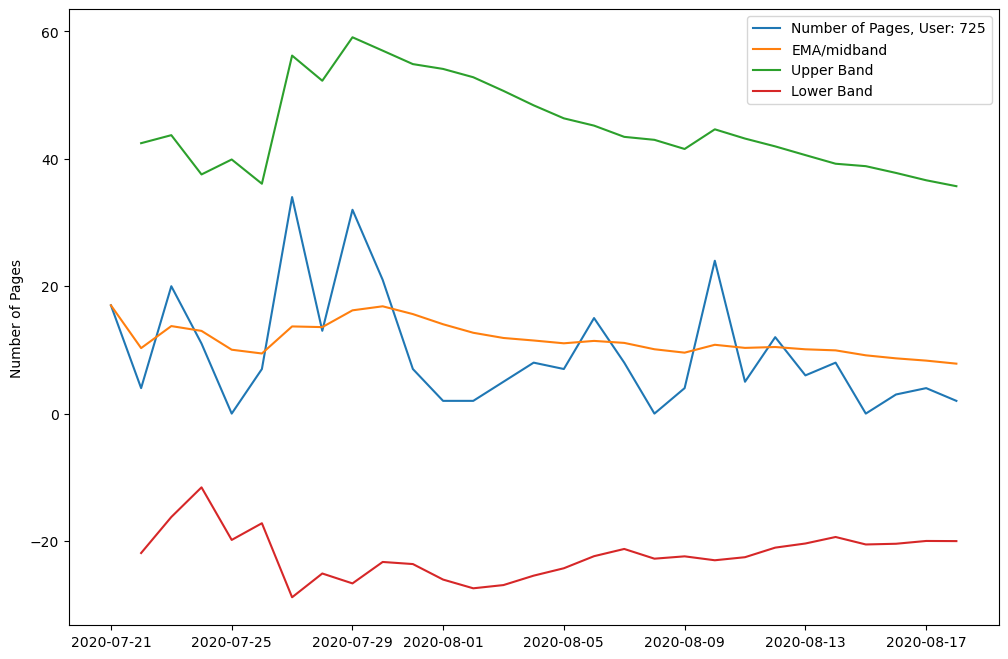

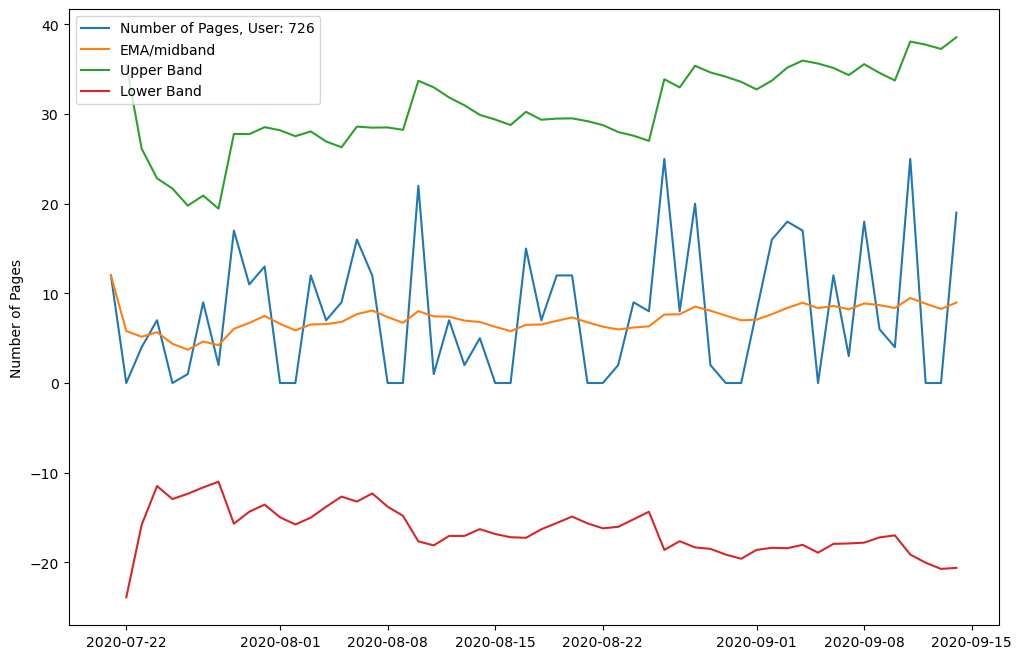

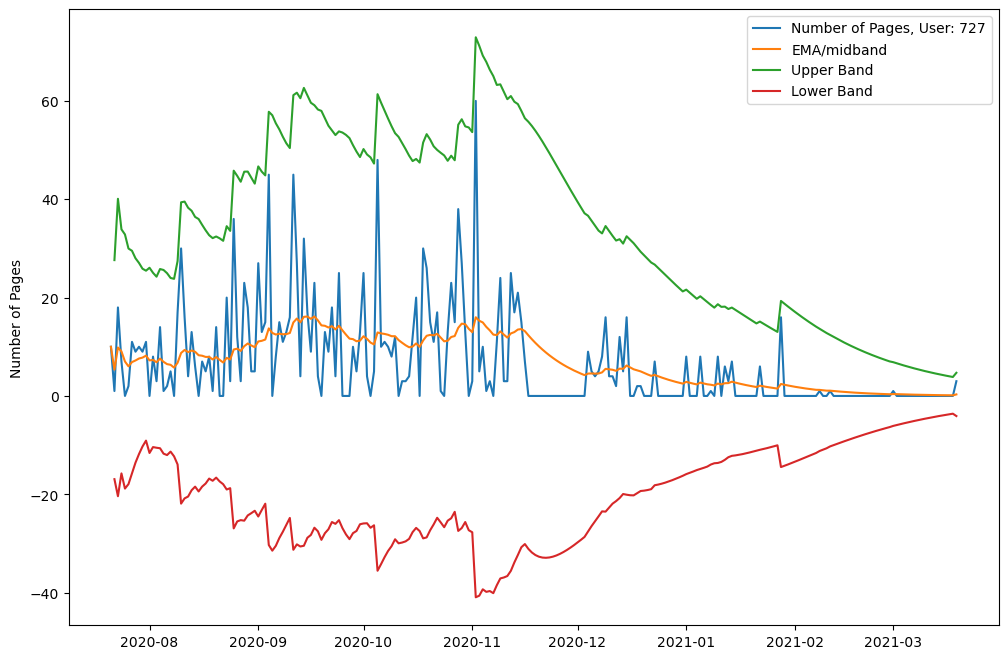

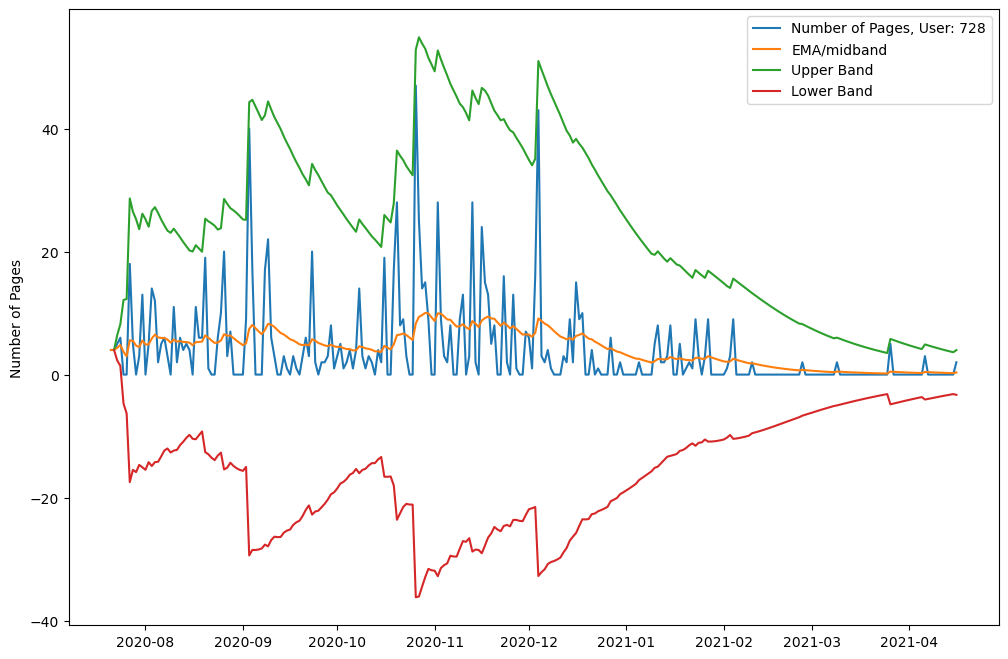

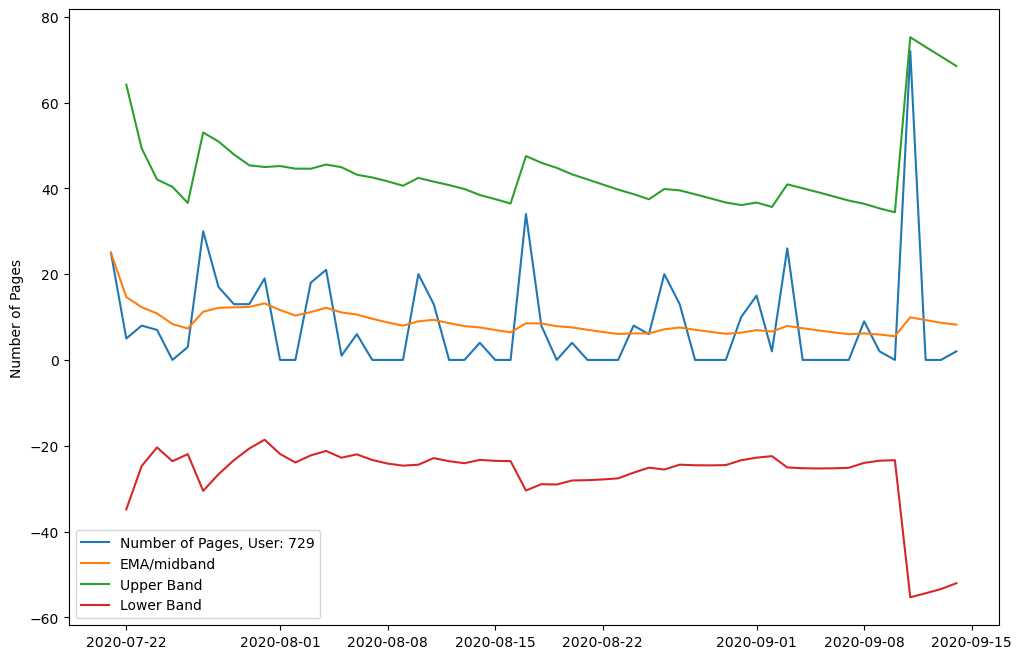

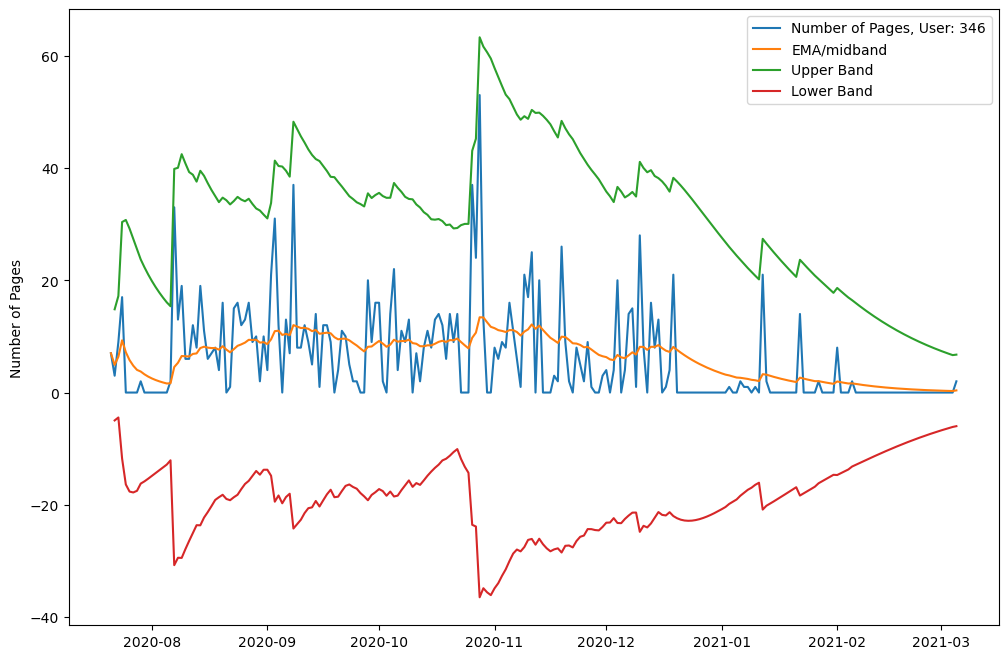

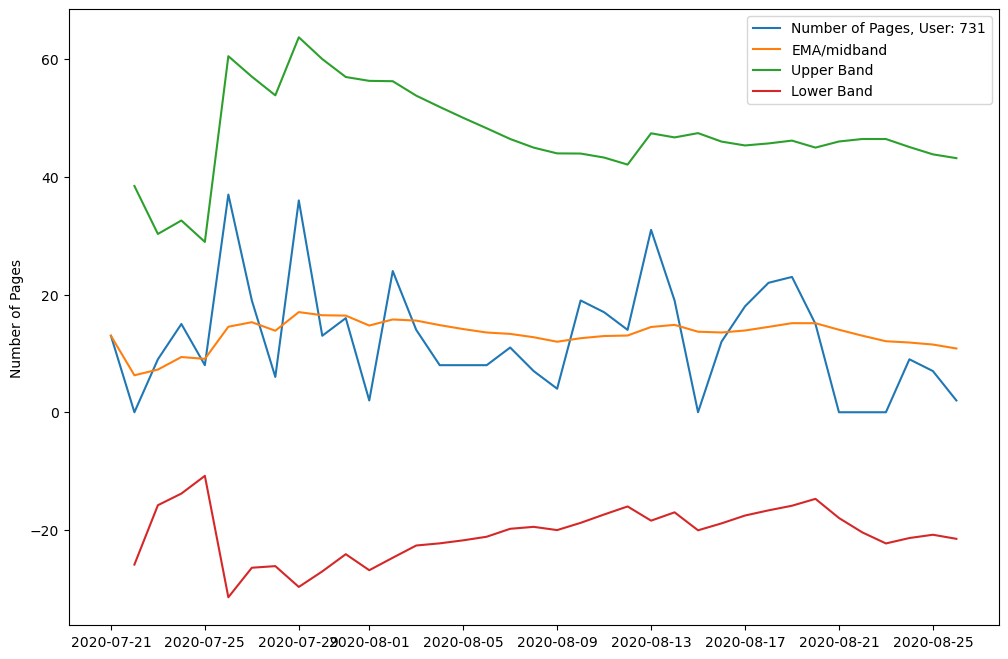

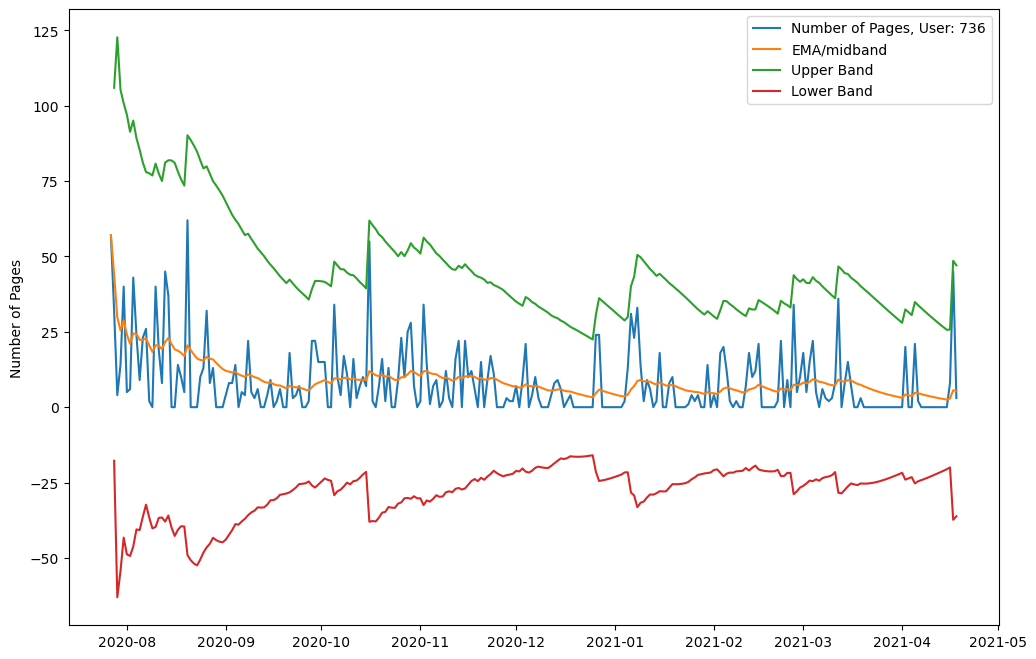

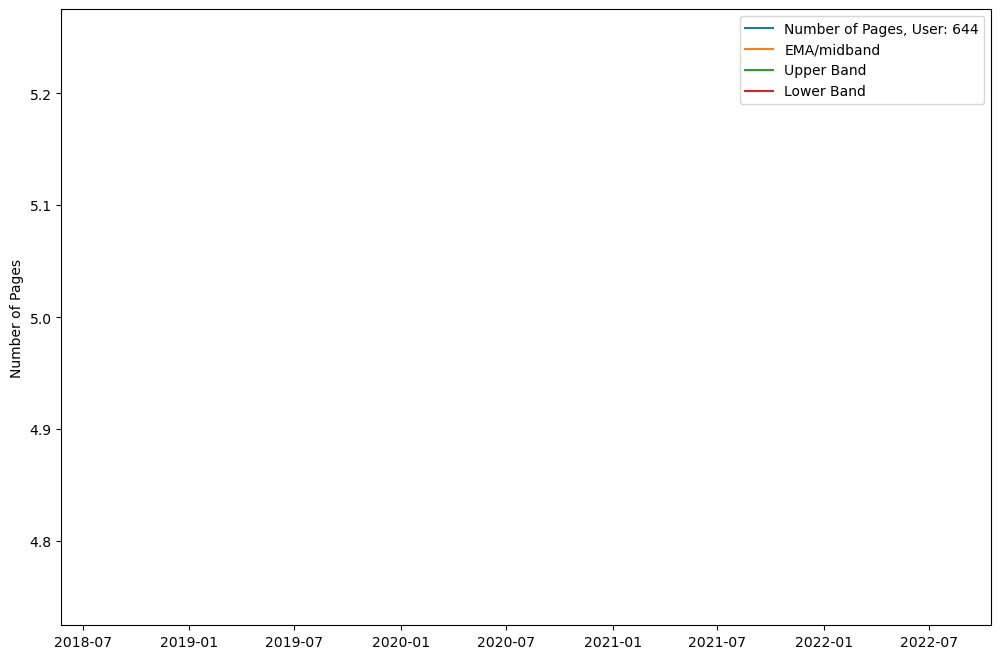

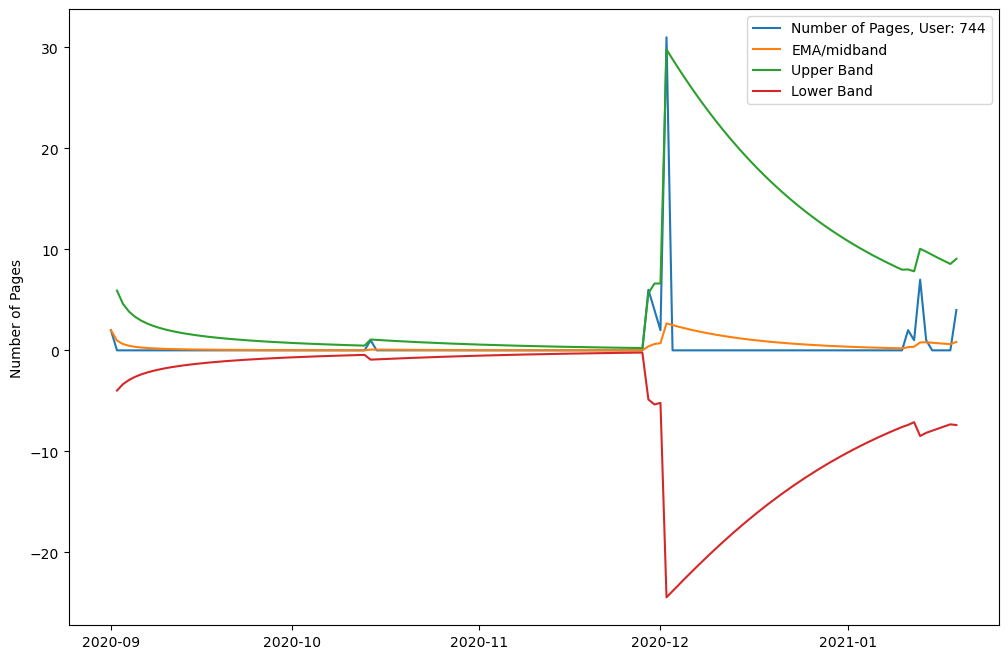

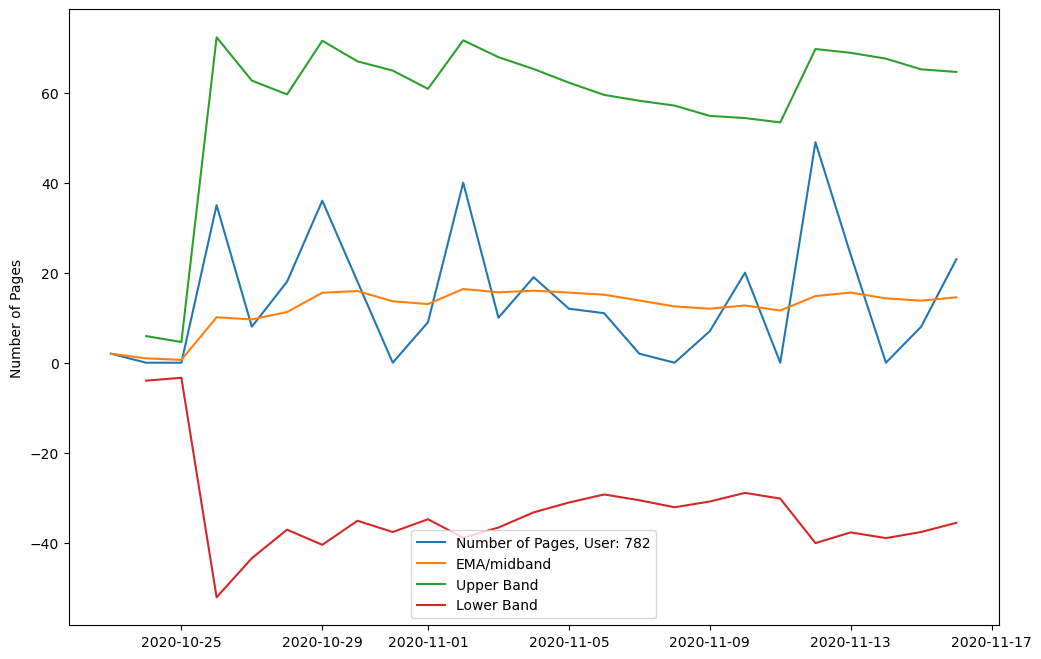

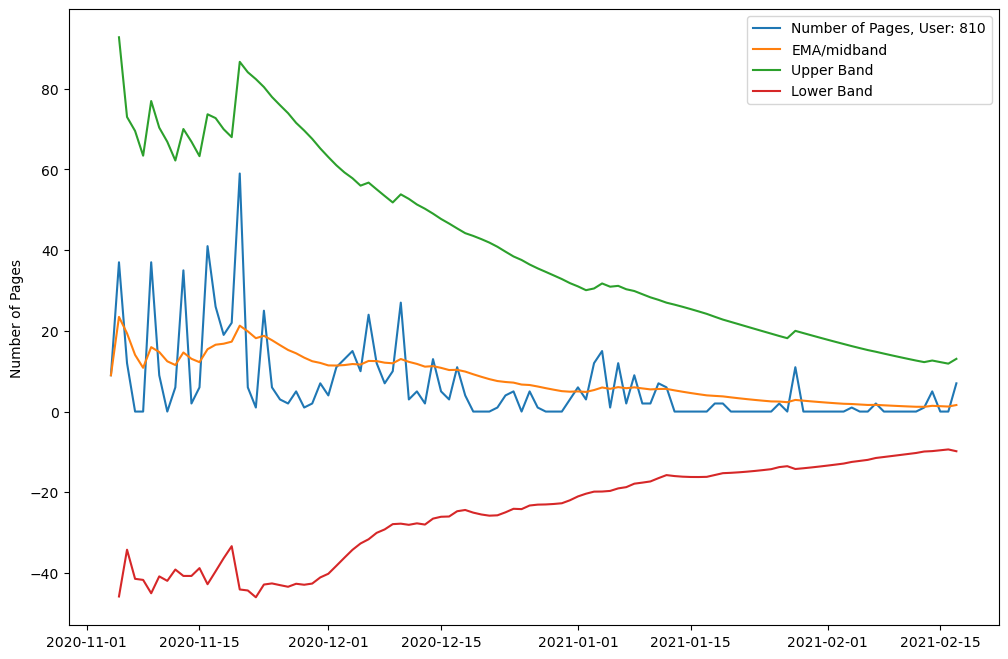

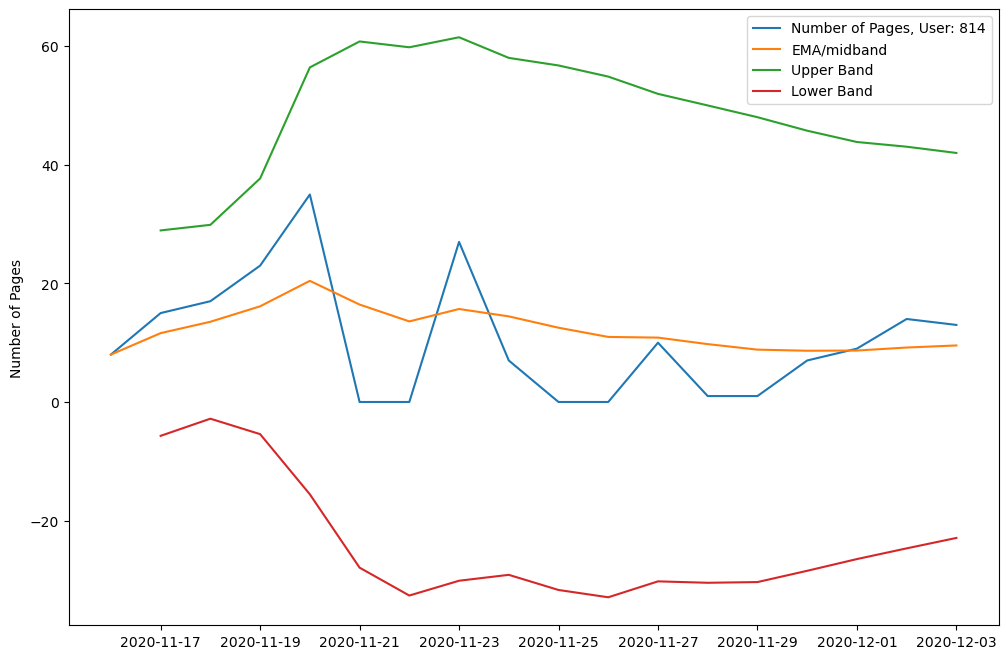

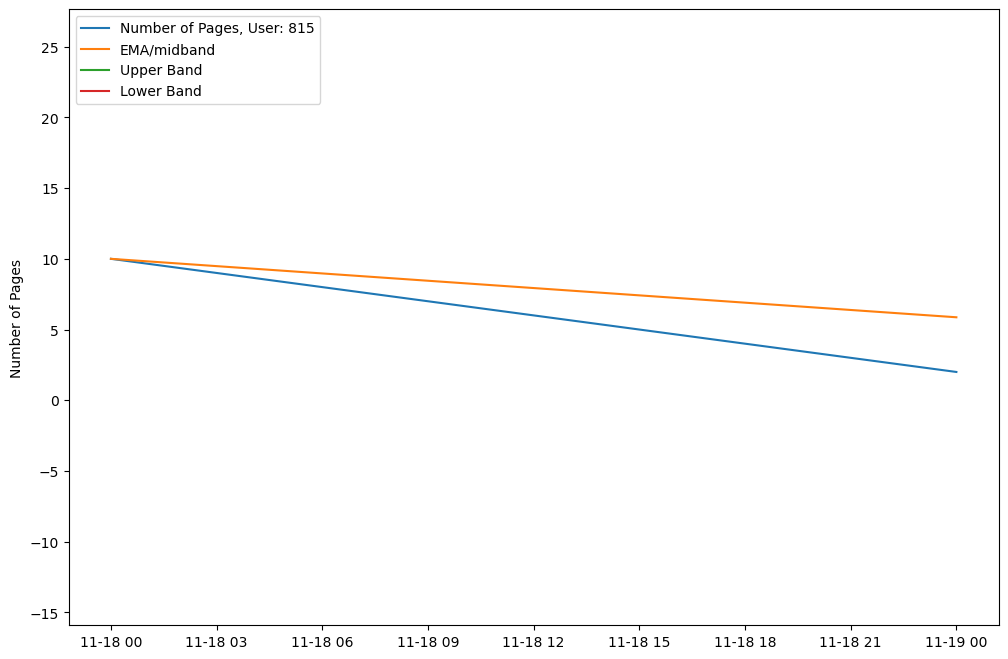

In [7]:
# # # Analyze anomalies using your 'find_anomalies' function
span = 30
weight = 3.5
# here we are looping through all user ids
anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = p.find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

> - The following is the number of unique IP addresses were returned from the data, the ip address may be tied to the staff, but it is not associated with a cohort_id which includes staff. This may need to be further investigates.
>      - We can confirm that this appear as an anomaly and can display that the curriculum was accessed heavily by this IP Address. This could be machine/malicious user activity or webscraping could be occuring from this address if there is a large record of pages being access by this IP address. To investigate further we could try to use status codes from requests to verify. 

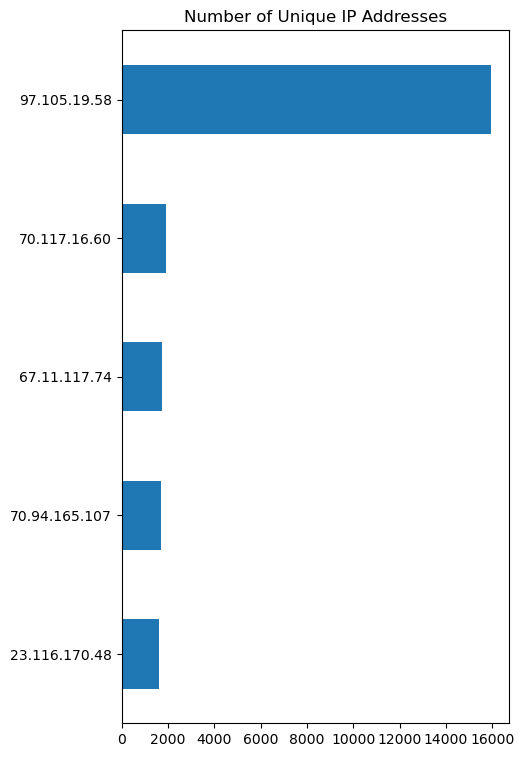

source_ip  user_id  freq_user_tagged_ip
104       156.80.4.2      349             0.946281
122  170.248.173.247       58             0.682927
244  216.177.165.194      367             0.888889
306     67.11.117.74      719             0.786003
319   68.201.219.223      429             0.550129
333     70.117.16.60      716             0.998949
335     70.117.6.133      111             0.694656
339     70.120.16.42      729             0.972414
348     70.121.163.5       61             0.779070
356   70.123.200.120      810             0.521212
361    70.123.209.40       62             0.571429
369    70.94.165.107      727             0.892128
389    72.181.105.81      372             0.728778
394   72.181.113.170      403             0.593137
414   76.185.211.152      346             0.997321
419     76.204.27.88      406             0.574257
454     97.105.19.61       61             0.593640

In [8]:
# # Plot top IP addresses
e.plot_top_ip_addresses(df)

# # Get user-tagged IP addresses
user_tagged_ip = e.get_user_tagged_ip(df)
user_tagged_ip

# 5. At some point in 2019, the ability for students and alumni to access both curricula (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? 

> 

> - We can see observartions on curriculum by each year, We can identify the access was shut off around May of 2018.
> - We can spikes in the each year as well noting students/alumni were accessing curriculm lessons for reference.

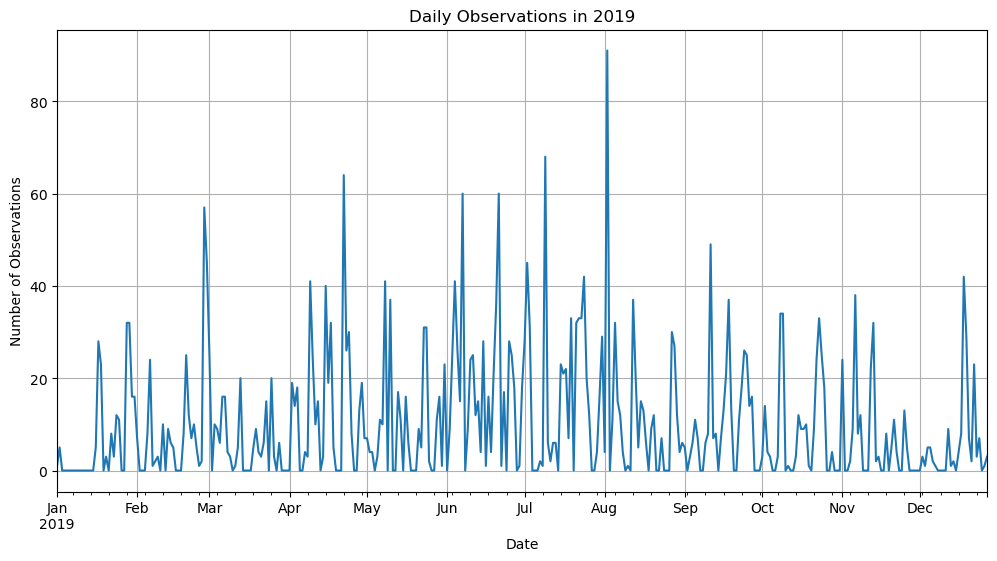

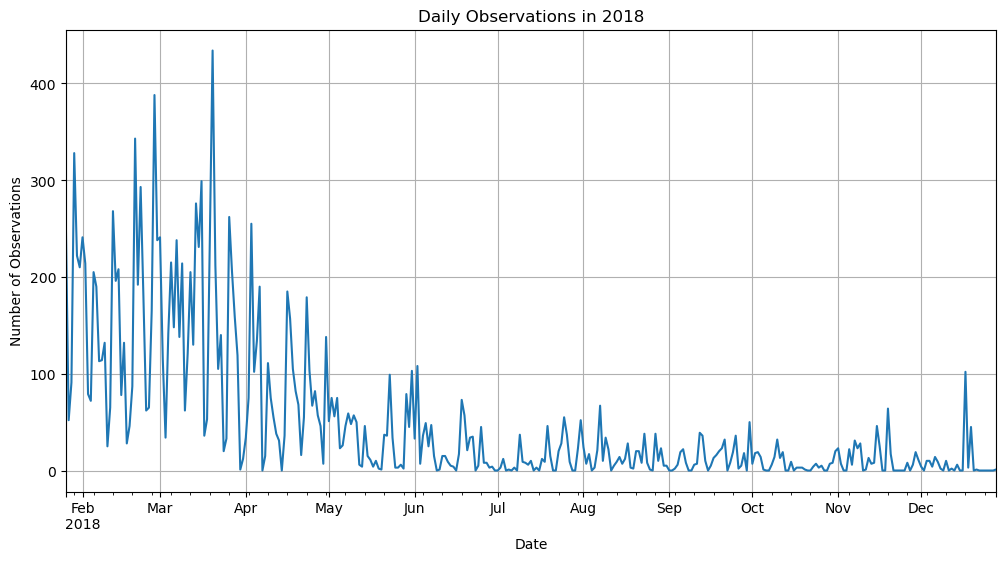

In [12]:
# data acquire and exploration prep
df = a.acquire_curlogs()
df = e.preprocess_data(df)

# filter dfs for each year recorded in data
dates_in_2018 = e.filter_data_by_year(df, 2018)
dates_in_2019 = e.filter_data_by_year(df, 2019)
dates_in_2020 = e.filter_data_by_year(df, 2020)

# observations in 2019
df_2019 = e.filter_data_by_year(df, 2019)
e.plot_daily_observations(df_2019, 2, 'Daily Observations in 2019')

# observations in 2018
df_2018 = e.filter_data_by_year(df, 2018)
e.plot_daily_observations(df_2018, 1, 'Daily Observations in 2018')

> - Here we can see how students from each cohort accessed other lesson from the codeuop curriculum in this timeframe and also showing access and visits over each year where appropriate for both program types.

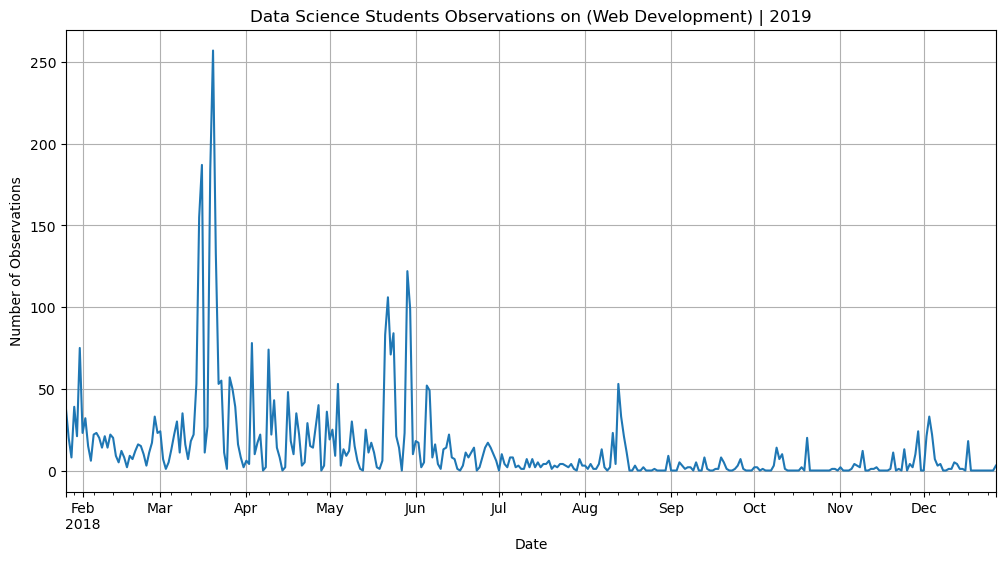

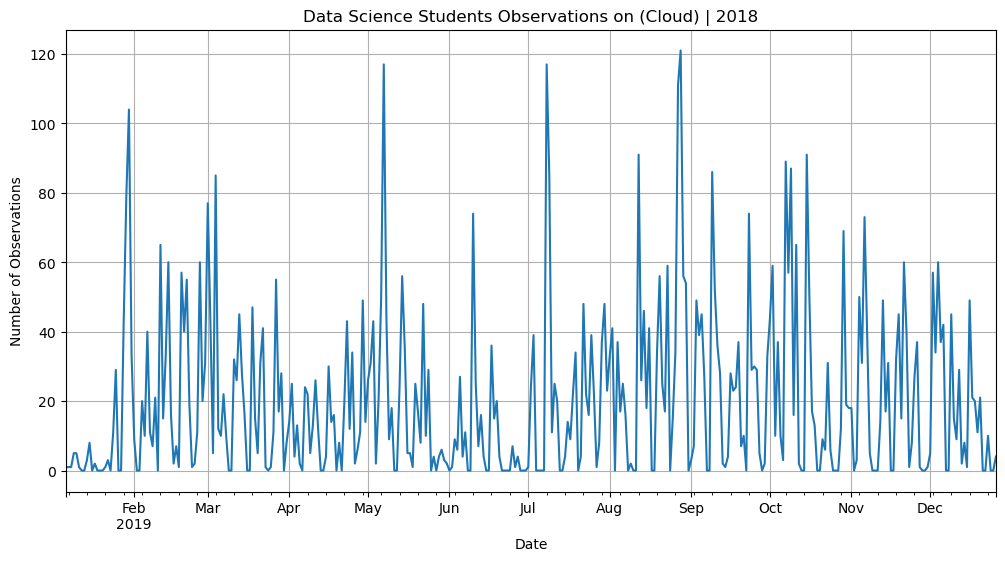

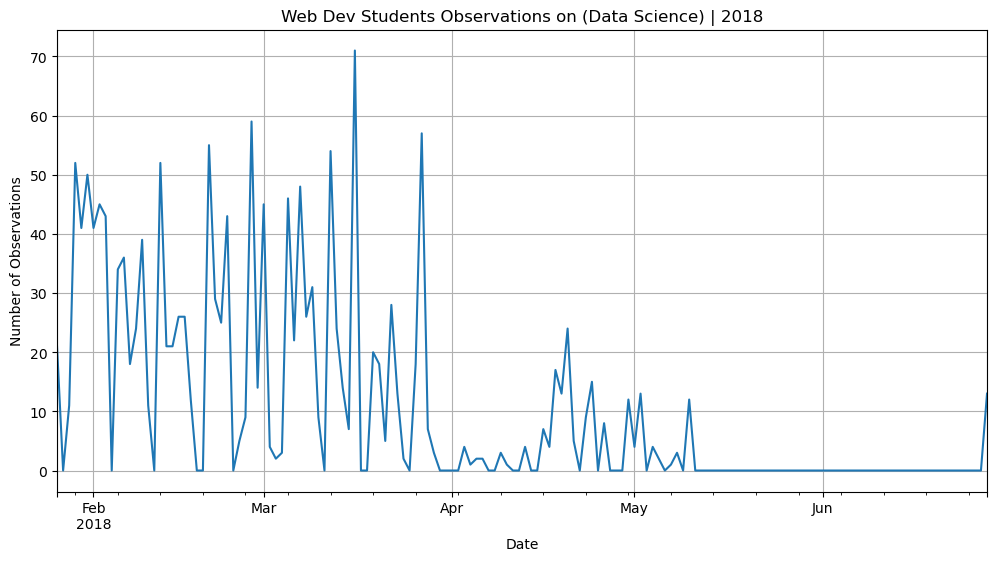

In [14]:
# set two dataframes containing only ds endpoints and wd endpoints
datascience_df = df[~df['endpoint'].str.contains('javascript|html|css|spring|java|bootstrap|web-design|jquery|mkdocs|search_index.json|spring|flask|virtual-enviornments|ajax|php|slides/sessions_and_cookies|slides/console_io|slides', case=False, na=False, regex=True)]
webdev_df = df[df['endpoint'].str.contains('javascript|css|html|bootstrap|web-design|jquery|mkdocs|search_index.json|spring|flask|virtual-enviornments|ajax|php|slides/sessions_and_cookies|slides/console_io|slides', case=False, na=False, regex=True)]

# observation in 2018 specifically for Web Development lesson endpoints
df_2018 = e.filter_data_by_year(datascience_df, 2018)
e.plot_daily_observations(df_2018, 2, 'Data Science Students Observations on (Web Development) | 2019')

# observation in 2019 specifically for Cloud lesson endpoints
df_2019 = e.filter_data_by_year(datascience_df, 2019)
e.plot_daily_observations(df_2019, 1, 'Data Science Students Observations on (Cloud) | 2018')

# observation in 2018 specifically for Data Science lesson endpoints
df_2018 = e.filter_data_by_year(webdev_df, 2018)
e.plot_daily_observations(df_2018, 3, 'Web Dev Students Observations on (Data Science) | 2018')